# Сборный проект №1

## Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.

## Цели и задачи проекта
- Предобработка данных
- Исследовательский анализ
  - Количество выпущенных игр в разные года
  - Изменение продаж на разных платформах
  - Выявление "актуального" периода для прогнозирования продаж на 2017 год
  - boxplot по глобальным продажам
  - Выводы о продажах в ходе исследовательского анализа
- Портрет каждого региона
  - Популярные платформы
  - Популярные жанры
  - Влияние рейтинга на продажи в регионе
- Проверка гипотез
  - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
  - Средние пользовательские рейтинги жанров Action и Sports разные
- Общий вывод

## Описание данных
Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.



## План работы
- Чтение данных
- Предобработка
- Исследовательский анализ
- Работа с данными по региаонам
- Выдвижение и проверка гипотез
- Общий вывод

Импорт библиотек, которые понадобятся в ходе работы над проектом

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

%matplotlib inline

посмотрим "сырые" данные

In [2]:
df = pd.read_csv('games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Данные выглядят реалистично. В них присутсвуют пропуски, также типы данных не везде выбраны оптимально, исправим это в следующем шаге. Проведем дальнейший анализ.

## 1. Предобработка данных

Названия столбцов представлены в неудобном для дальнейшей работы виде. Исправим это

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Проверим соответствуют ли типы данных содержанию, если нет, то изменим их на нужные

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Найдем явные дубликаты и удалим их, если они есть.

In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Для дальнейшего анализа не совсем удобно использовать эти названия. Внесем некоторые коррективы.

In [10]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [11]:
df.loc[df['platform'] == 'Wii', 'platform'] = 'Nintendo Wii'
df.loc[df['platform'] == 'NES', 'platform'] = 'Nintendo ES'
df.loc[df['platform'] == 'GB', 'platform'] = 'GB-60'
df.loc[df['platform'] == 'DS', 'platform'] = 'Nintendo DS'
df.loc[df['platform'] == 'X360', 'platform'] = 'Xbox 360'
df.loc[df['platform'] == 'SNES', 'platform'] = 'Nintendo SNES'
df.loc[df['platform'] == 'GBA', 'platform'] = 'Game Boy Advance'
df.loc[df['platform'] == '3DS', 'platform'] = 'Nintendo 3DS'
df.loc[df['platform'] == 'N64', 'platform'] = 'Nintendo 64'
df.loc[df['platform'] == 'XB', 'platform'] = 'Xbox'
df.loc[df['platform'] == '2600', 'platform'] = 'Atari 2600'
df.loc[df['platform'] == 'XOne', 'platform'] = 'Xbox One'
df.loc[df['platform'] == 'WiiU', 'platform'] = 'Nintendo Wii U'
df.loc[df['platform'] == 'GC', 'platform'] = 'Nintendo GameCube'
df.loc[df['platform'] == 'GEN', 'platform'] = 'SEGA Retro Genesis'
df.loc[df['platform'] == 'DC', 'platform'] = 'Dendy Classic'
df.loc[df['platform'] == 'PSV', 'platform'] = 'PS Vita'
df.loc[df['platform'] == 'SAT', 'platform'] = 'Sega Saturn'
df.loc[df['platform'] == 'SCD', 'platform'] = 'Nintendo SNES SCD'
df.loc[df['platform'] == 'WS', 'platform'] = 'WonderSwan'
df.loc[df['platform'] == 'NG', 'platform'] = 'Neo Geo'

In [12]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [13]:
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,SEGA Retro Genesis,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,SEGA Retro Genesis,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Ранее в проекте мы смотрели пропущенные значения в столбцах. В столбцах name и genre было по 2 пропущенных значения, как видно эти строчки не несут в себе никакой полезной информации, восстановить ее тоже не представляется возможным, поэтому удалим их

In [14]:
df.dropna(subset=['genre'], inplace=True)

Расшифруем уникальные значения рейтингов игр, чтобы убедиться, что все они существуют и ошибок нет.

E - everyone (для всех)

nan - пропуск данных

M -mature 17+ (зрелые)

T - teen (подростки)

E10+ - everyone 10+ (для всех старше 10 лет)

K-A - kids to adults (в последствии было переименовано в E10+)

AO - adults only 18+ (только для взрослых)

EC - early childhood (раннее дество)

RP - rating pending (ожидаемый рейтинг, вероятно зрелый 17+)

In [15]:
df.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Заменим значение K-A на E10+, так как это одно и тоже, в самой ESRB поступили также

In [16]:
df.loc[df['rating'] == 'K-A', 'rating'] = 'E10+'

In [17]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [18]:
df['year_of_release'].isna().sum()

269

In [19]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [20]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Мы выяснили, что изменить типы данных необходимо в 3 столбцах: year_of_release float64 -> int32, critic_score float64 -> int32, user_score object -> float32.
Перед тем как это сделать необходимо удалить пропуски в данных и заменить 'tbd' на какое-то значение, которое воспринимается типом данных float, тип данных int также не воспринимает некоторые значения, которое содержатся в столбце (NaN), поэтому сначала избавимся от них

In [21]:
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [22]:
df[df['year_of_release'].isna()].shape[0] / df.shape[0] * 100

1.6095255190570215

Пропуски есть в 4 столбацах, для преобразования типа данных с ними нужно разобраться, можно удалить строки, где пропущен год выпуска игры, а не заполнять вручную пропущенные значения (процент потери данных составит 1.6, что допустимо). Пропуски в данном могли образоваться из-за невнимательного заполнения информации (PDC World Championship Darts 2008	тому пример) или из-за того, что год выпуска неизвестен (что маловероятно).

Удалять пропущенные значения в столбцах critic_score, user_score и rating нельзя, ведь мы потеряем больше 10% данных, поэтому заменим их на ноль для того, чтобы в следующих шагах с изменением типов данных не было проблем.

In [23]:
df.dropna(subset=['year_of_release'], inplace=True)

Среди уникальных значений user_score (оценка пользователей) есть выбивающиеся значение из 10-бальной шкалы - 'tbd'. Аббравеатура TBD (англ. - To Be Decided или To Be Determined) будет определено. получается, что это те игры, которые еще не получили оценку от пользователей, заменим это значение на NaN, чтобы не исказить опистельную статистику

In [24]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.NaN

In [25]:
df['critic_score'].fillna(0, inplace=True)
df['user_score'].fillna(0, inplace=True)

In [26]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
dtype: int64

Будем считать, что отсутствие значений в столбце rating обусловнленно тем, что не смогли определить возрастное ограничение. Заполним пропуски значением 'Не определен'

In [27]:
df['rating'].fillna('Не определен', inplace=True)

In [28]:
# year_of_release float64 -> int32, critic_score float64 -> int32, user_score -> float32
df = df.astype({'year_of_release': 'int32', 'critic_score': 'int32', 'user_score': 'float32'})

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int32  
 9   user_score       16444 non-null  float32
 10  rating           16444 non-null  object 
dtypes: float32(1), float64(4), int32(2), object(4)
memory usage: 1.3+ MB


Посчитаем суммарные продажи и запишем их в отдельный столбец

In [30]:
df['total_sales']=df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [31]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Nintendo Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,Nintendo ES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,Не определен,40.24
2,Mario Kart Wii,Nintendo Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Nintendo Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB-60,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,Не определен,31.38


На данном этапе мы сделали более читаемыми названия платформ, привели типы данных к оптимальным, убрали пропуски там, где это было необходимо, увидели некоторые значения столбцов, что полезно для последующго анализа, нашли суммарные продажи по регионам.

## 2. Исследовательский анализ данных

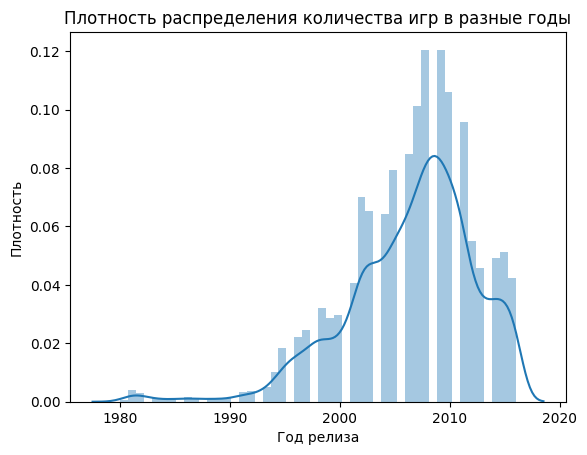

In [32]:
sns.distplot(a=df['year_of_release'], hist=True, bins=50, kde=True, rug=False, axlabel='Год релиза');
plt.title('Плотность распределения количества игр в разные годы');
plt.ylabel('Плотность');

In [33]:
df[df['year_of_release'] < 1999]['genre'].shape[0] / df.shape[0]

0.09948917538311847

Как видно из гистограммы в период с 1980 по 1999 вышло меньше 10% от общего количества игр. Данные за все периоды нам не понадобятся, индустрия игр достаточно быстро менялась на начальном этапе, поэтому часть данных нам не понадобятся для построения прогноза на 2017 год.

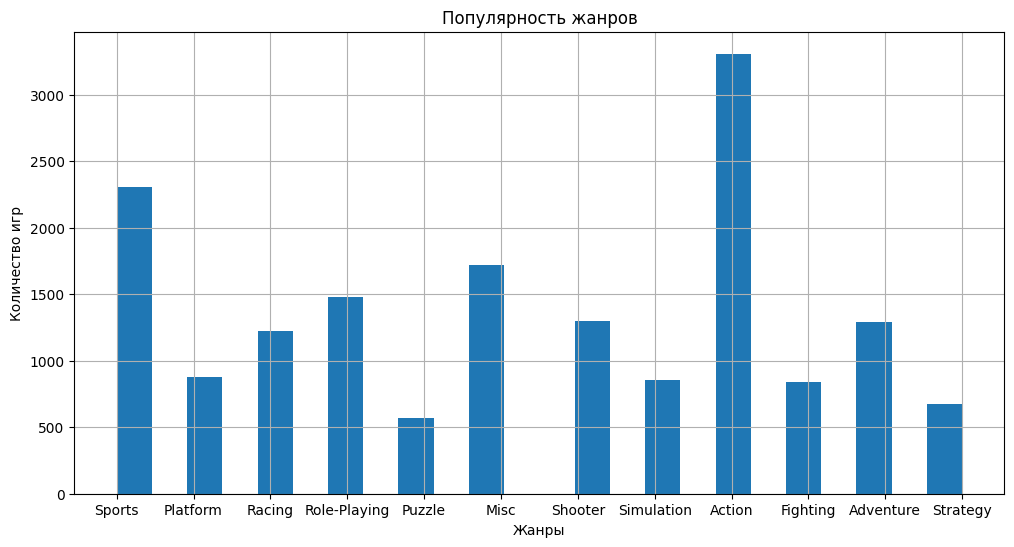

In [34]:
df.genre.hist(bins=24, figsize=(12,6));
plt.title('Популярность жанров');
plt.xlabel('Жанры');
plt.ylabel('Количество игр');

Как видно из гистограммы, самые популярные игры за все года, что представлены в выборке - "Action", "Misc" и "Sports". Причем экшн лидирует с большим отрывом.

In [35]:
top_platforms = df.groupby('platform')['total_sales'].agg('sum').sort_values(ascending=False).head(10)
top_platforms

platform
PS2                 1233.56
Xbox 360             961.24
PS3                  931.34
Nintendo Wii         891.18
Nintendo DS          802.78
PS                   727.58
PS4                  314.14
Game Boy Advance     312.88
PSP                  289.53
Nintendo 3DS         257.81
Name: total_sales, dtype: float64

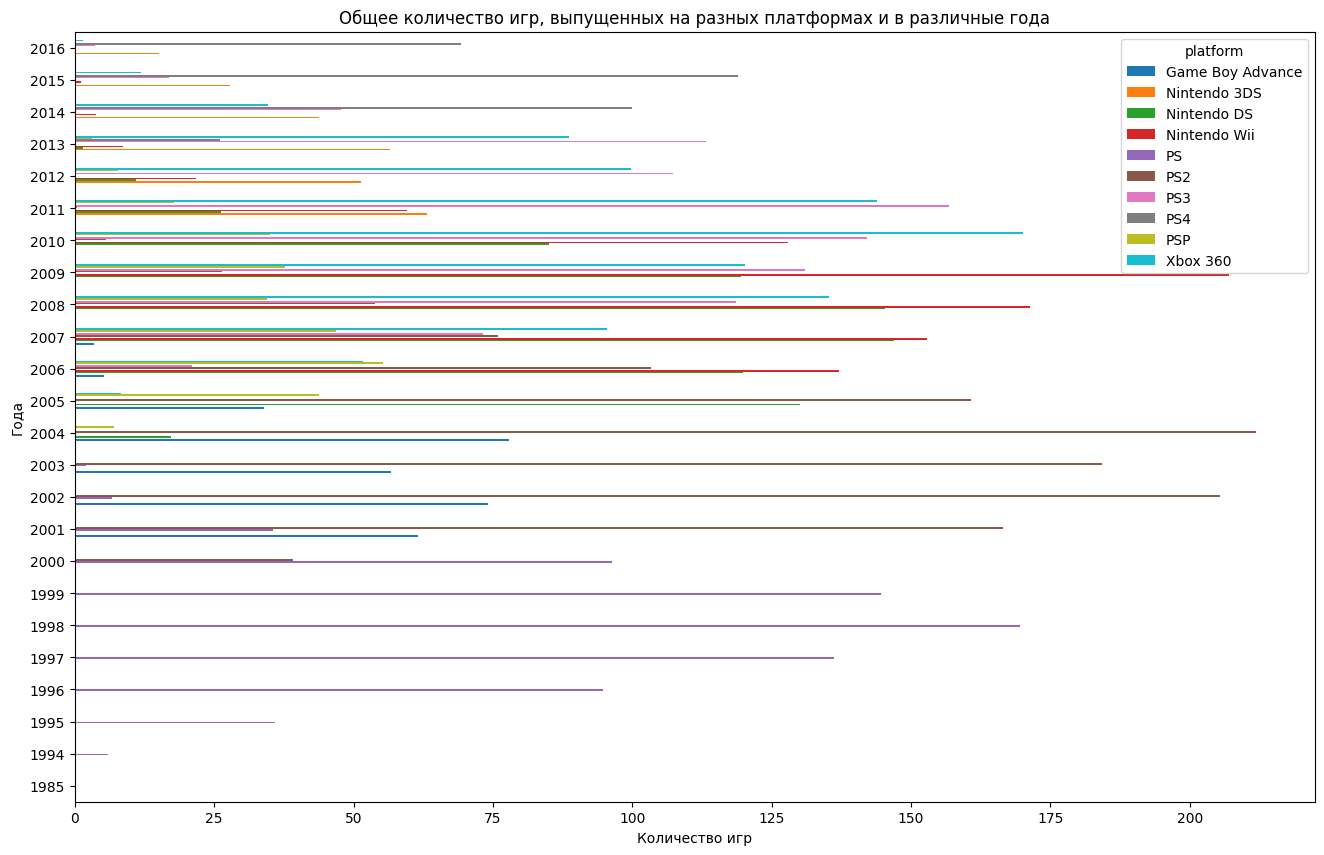

In [36]:
df.query('platform in @top_platforms.index').pivot_table(index='year_of_release', columns='platform',values='total_sales', aggfunc='sum').plot(kind='barh', figsize=(16,10));
plt.title('Общее количество игр, выпущенных на разных платформах и в различные года');
plt.xlabel('Количество игр');
plt.ylabel('Года');

Рассмотрим самые популярные платформы по продажам. Построим столбчатый горизонтальный график, возьмем отдельно каждый год, представленный в датасете и внутри него выделим количество продаж по платформам. С 2000 до 2004 PS2 была лидером по продажам, в 2004 появилась Nintendo DS и достаточно быстро обогнала по популярности PS2, в 2006 были уже все популярные платформы и лидером стала Nintendo Wii, только появившись на рынке. К 2010 году PS2 "устарела" и продажи едва превысили ~5 млн копий. У Nintendo Wii и Nintendo DS похожая история, условный "цикл жизни" консолей ~10 лет.

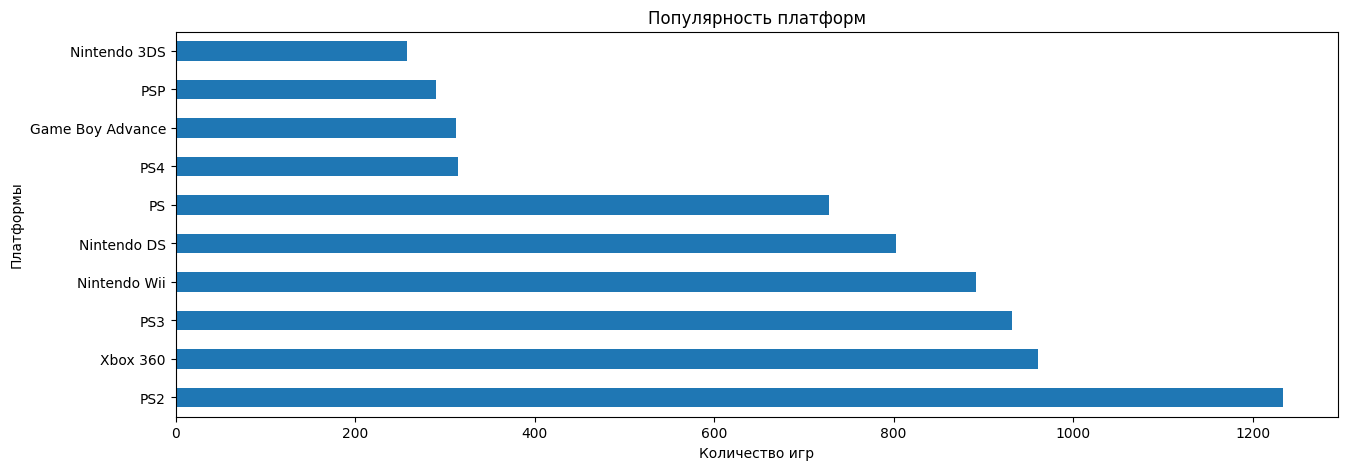

In [37]:
top_platforms.plot(x="platform", y="total_sales", kind='barh', figsize=(15,5));
plt.title('Популярность платформ');
plt.xlabel('Количество игр');
plt.ylabel('Платформы');

Более внимательно посмотрим на каждую популярную платформу

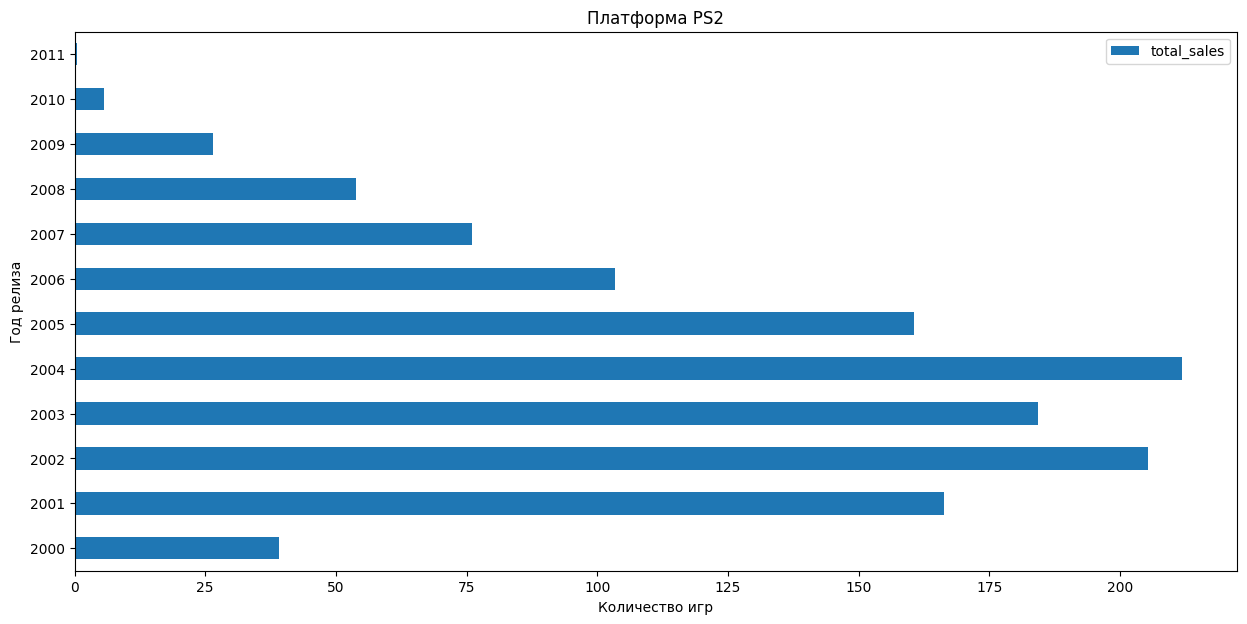

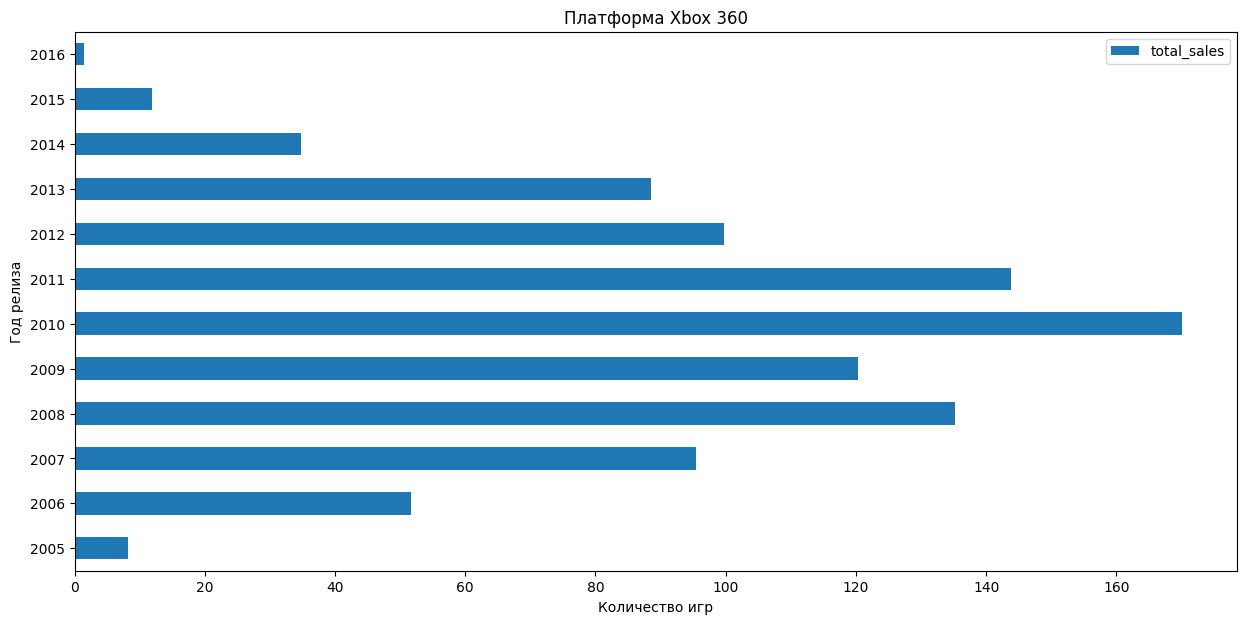

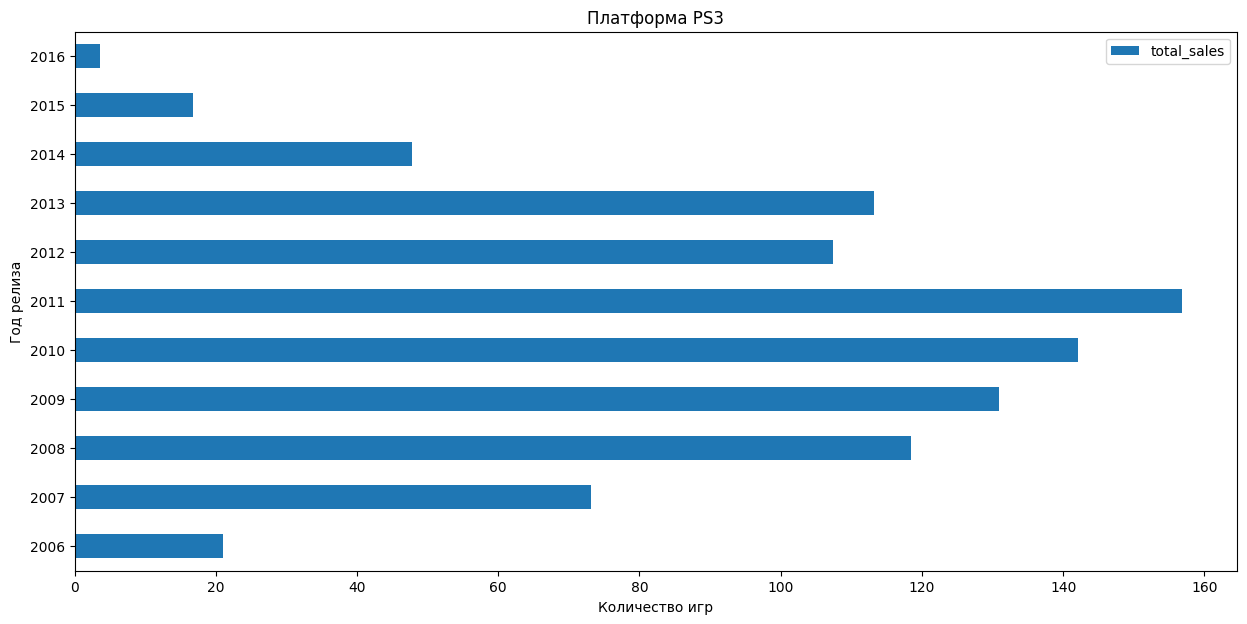

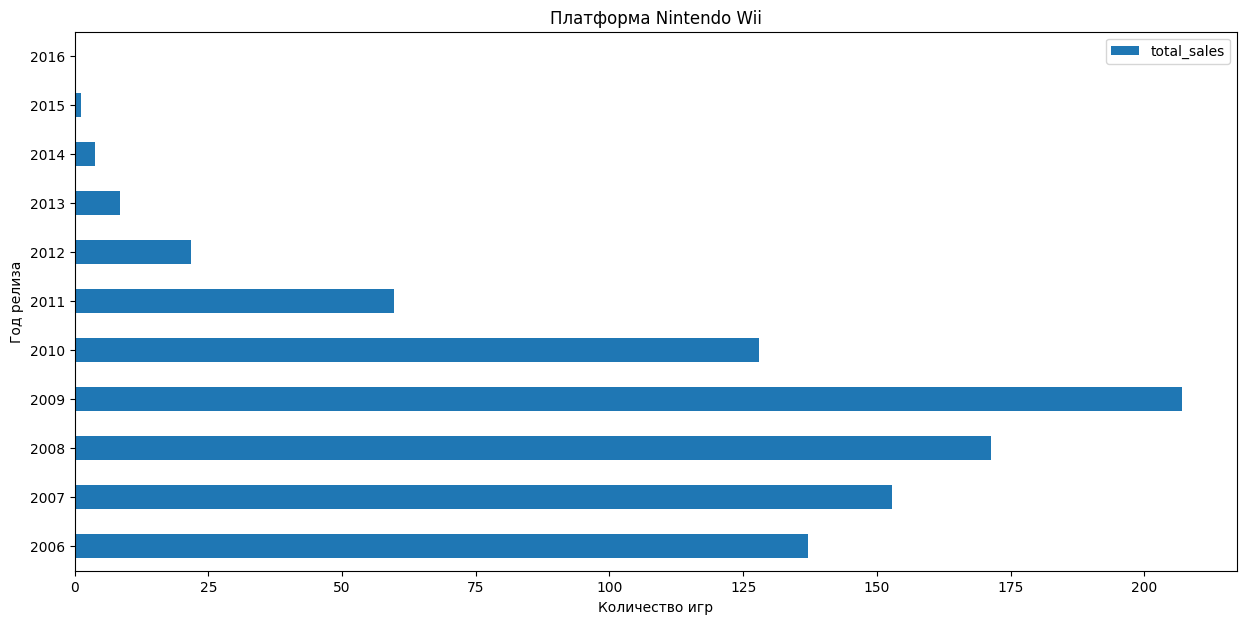

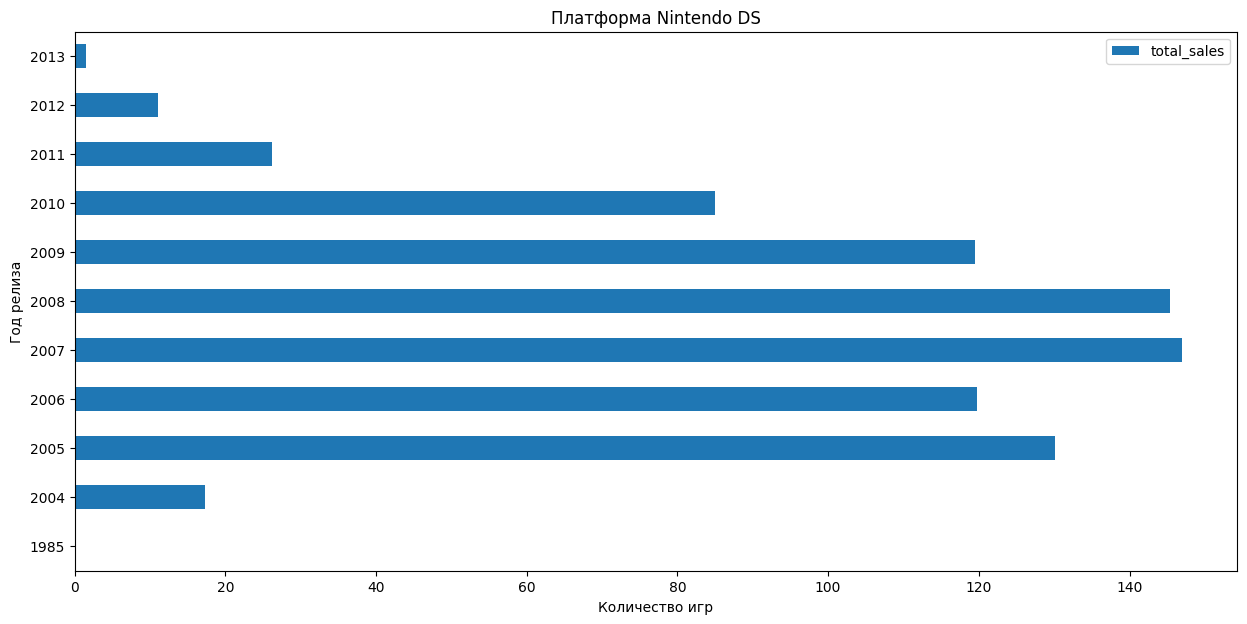

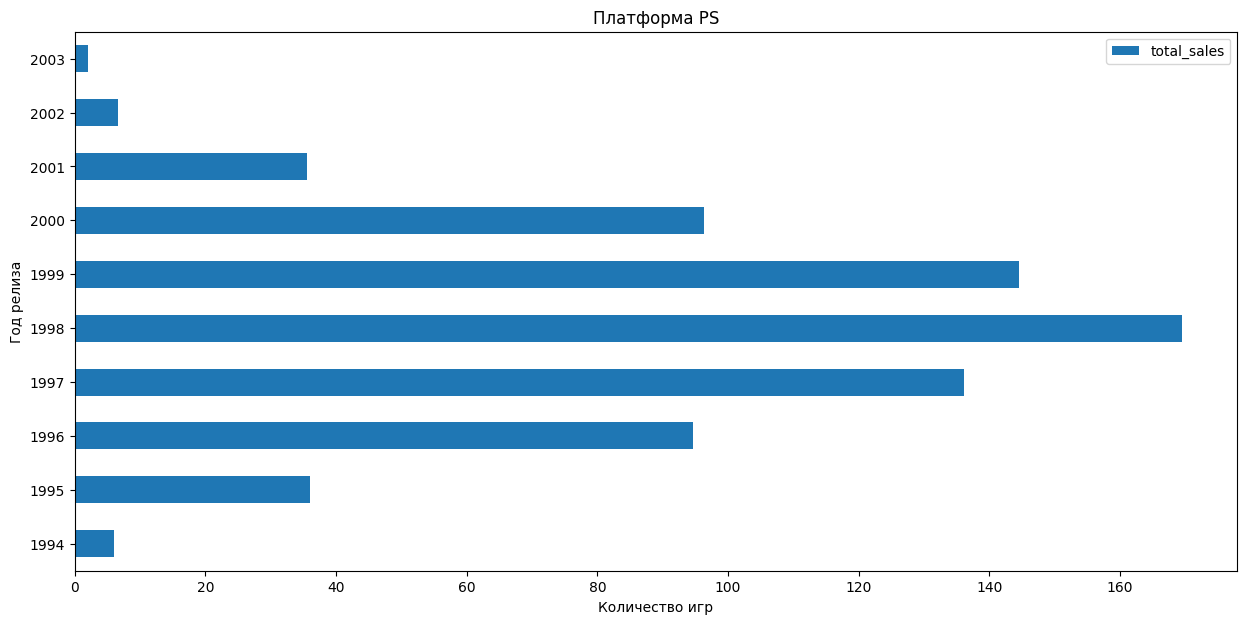

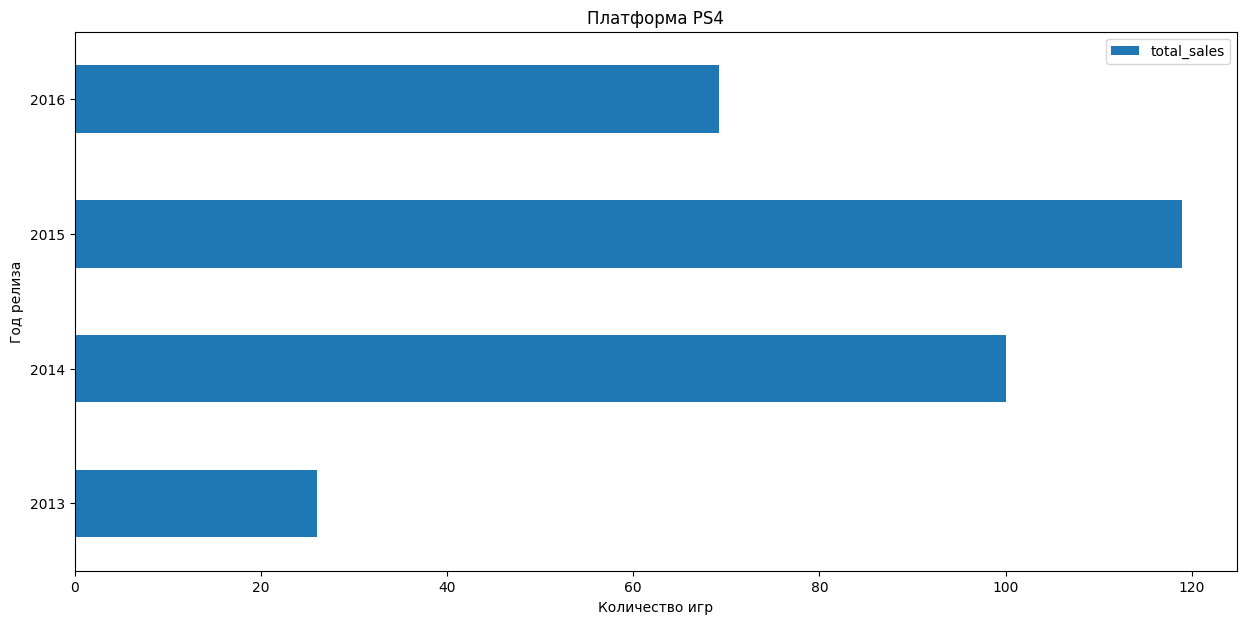

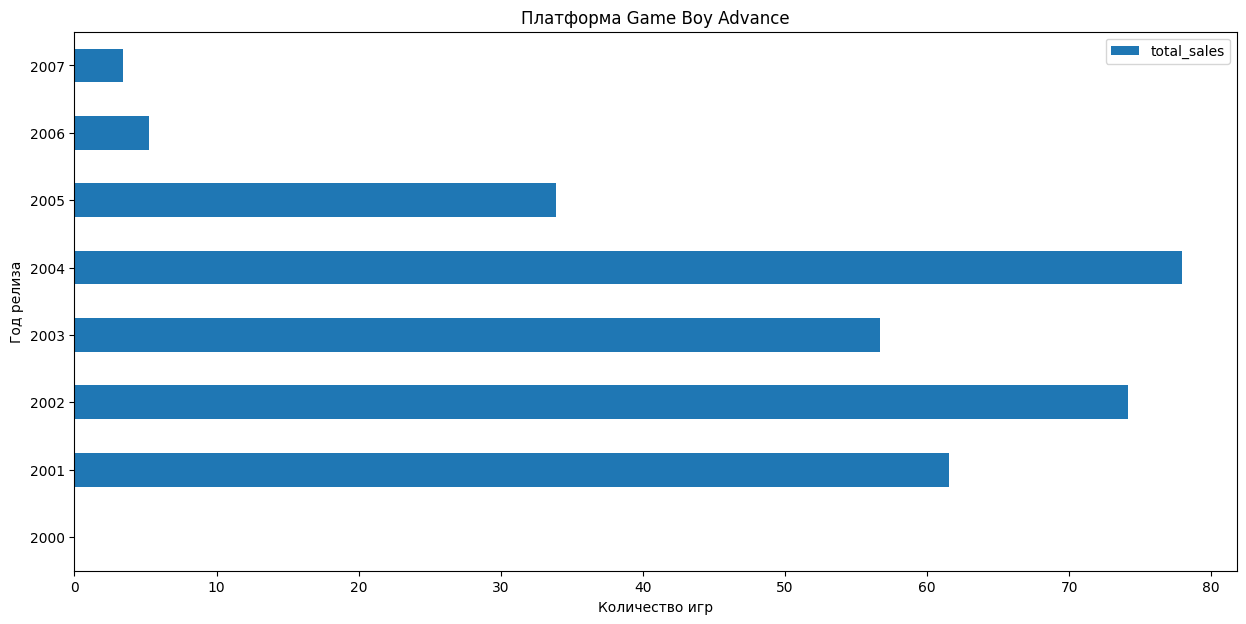

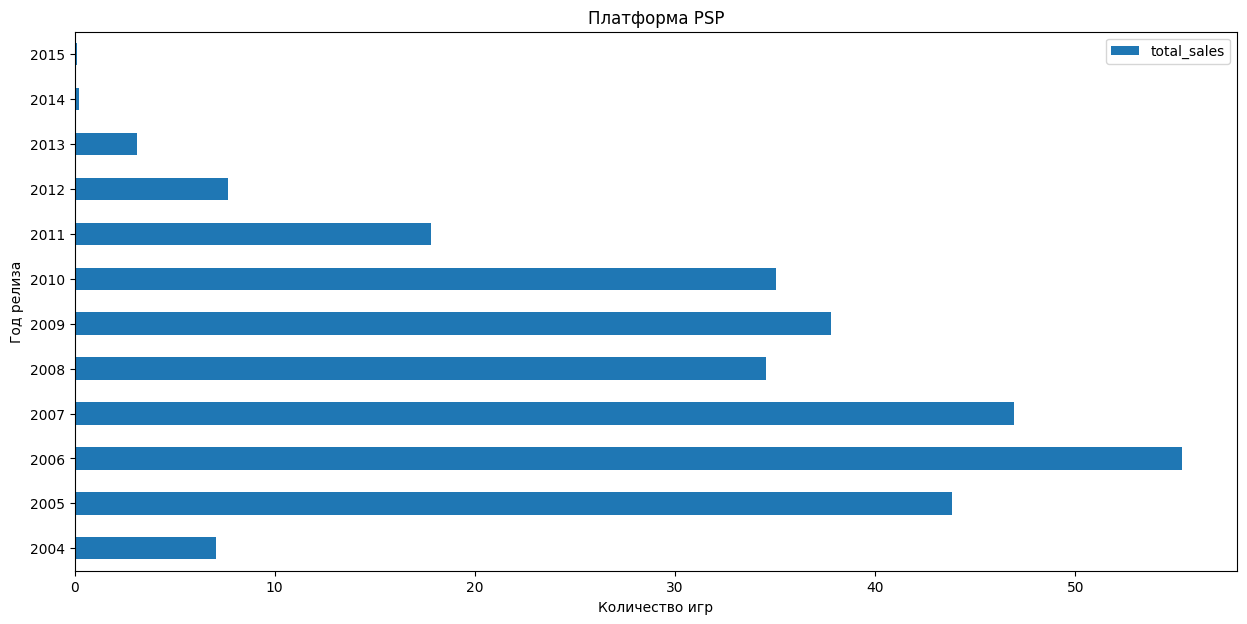

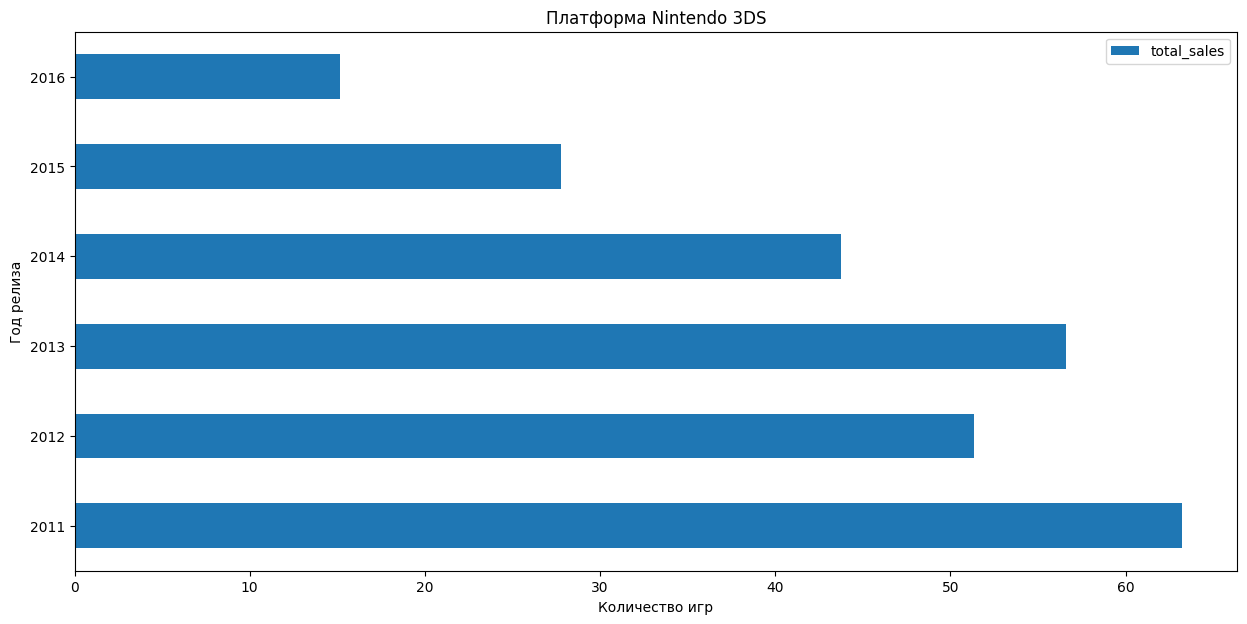

In [38]:
for platform in top_platforms.index:
  df[df['platform'] == platform].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'barh', figsize=(15,7))
  plt.title(f'Платформа {platform}');
  plt.xlabel('Количество игр');
  plt.ylabel('Год релиза');

После внимательного рассмотрения продаж на отдельных консолях можно сказать, что данные распределение похоже на нормальное. В среднем платформа приходит к пику продаж через 5 лет после релиза консоли.
Рассматривать период до 2006 года - нецелесообразно, так как прогноз нужно сделать на 2017 год, то данные, которые находятся дальше, чем жизненный консолей (10 лет) могут исказить прогноз. Обозначим за актуальный период года с 2012 (включительно) по 2016 (тоже включительно)

In [39]:
# Возьмем данные только за актуальный период
actual_df = df.query('year_of_release >= 2012')

Проверим изменились ли лидирующие по продажам платформы

In [40]:
top_10_platforms = actual_df.groupby('platform')['total_sales'].agg('sum').sort_values(ascending=False).head(10)
print(f'Популярные платформы из исходного датасета \n{top_platforms} \n\n\nПопулярные платформы из актуального датасета \n{top_10_platforms}')

Популярные платформы из исходного датасета 
platform
PS2                 1233.56
Xbox 360             961.24
PS3                  931.34
Nintendo Wii         891.18
Nintendo DS          802.78
PS                   727.58
PS4                  314.14
Game Boy Advance     312.88
PSP                  289.53
Nintendo 3DS         257.81
Name: total_sales, dtype: float64 


Популярные платформы из актуального датасета 
platform
PS4               314.14
PS3               288.79
Xbox 360          236.54
Nintendo 3DS      194.61
Xbox One          159.32
Nintendo Wii U     82.19
PC                 62.65
PS Vita            49.18
Nintendo Wii       35.37
Nintendo DS        12.55
Name: total_sales, dtype: float64


Из-за того, что мы рассматриваем не полный временной промежуток, то и популярные платформы изменились, работать надо с обновленным списком популярных платформ, ведь этот анализ поможет сделать прогноз на 2017.
В первом списке некоторые платформы уже неактуальны и игры на них не выпускаются, и учитывать эти консоли нет смысла

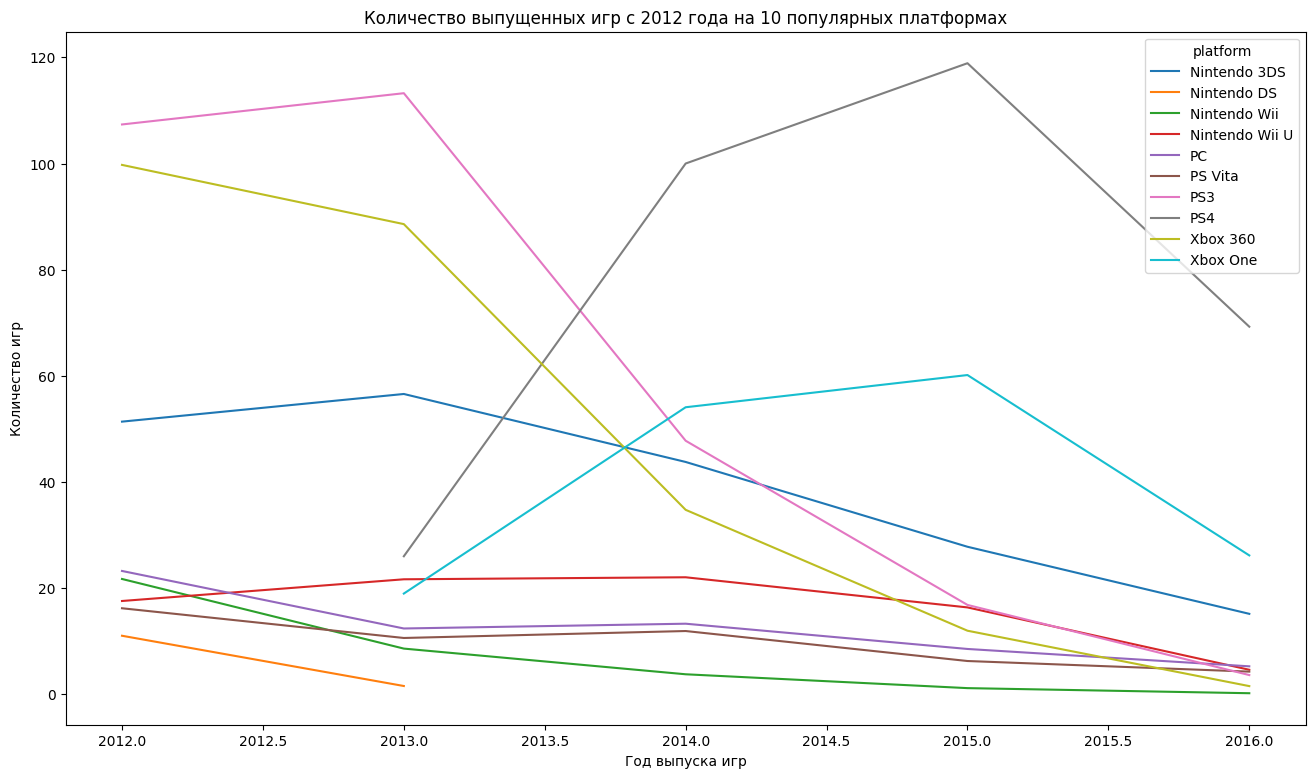

In [41]:
actual_df.query('platform in @top_10_platforms.index').pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(16, 9));
plt.title('Количество выпущенных игр с 2012 года на 10 популярных платформах');
plt.xlabel('Год выпуска игр');
plt.ylabel('Количество игр');

К 2016 году продажи игр на платформах сильно упали. PS4 показывает самые большие продажи, потому что платформа относительно новая, PC показывает хоть и небольшие, но стабильные продажи, также относительно прибыльными являются Nintendo 3DS и Xbox One, PS Vita тоже показывает небольшие, но стабильные продажи. Остальные платформы либо неактуальны (игры не выпускаются уже несколько лет), либо продажи нулевые.

Таким образом, потенциально прибыльными платформами являются:
- PS4
- Xbox One
- PC

### Построим boxplot для различных платформ по общим продажам

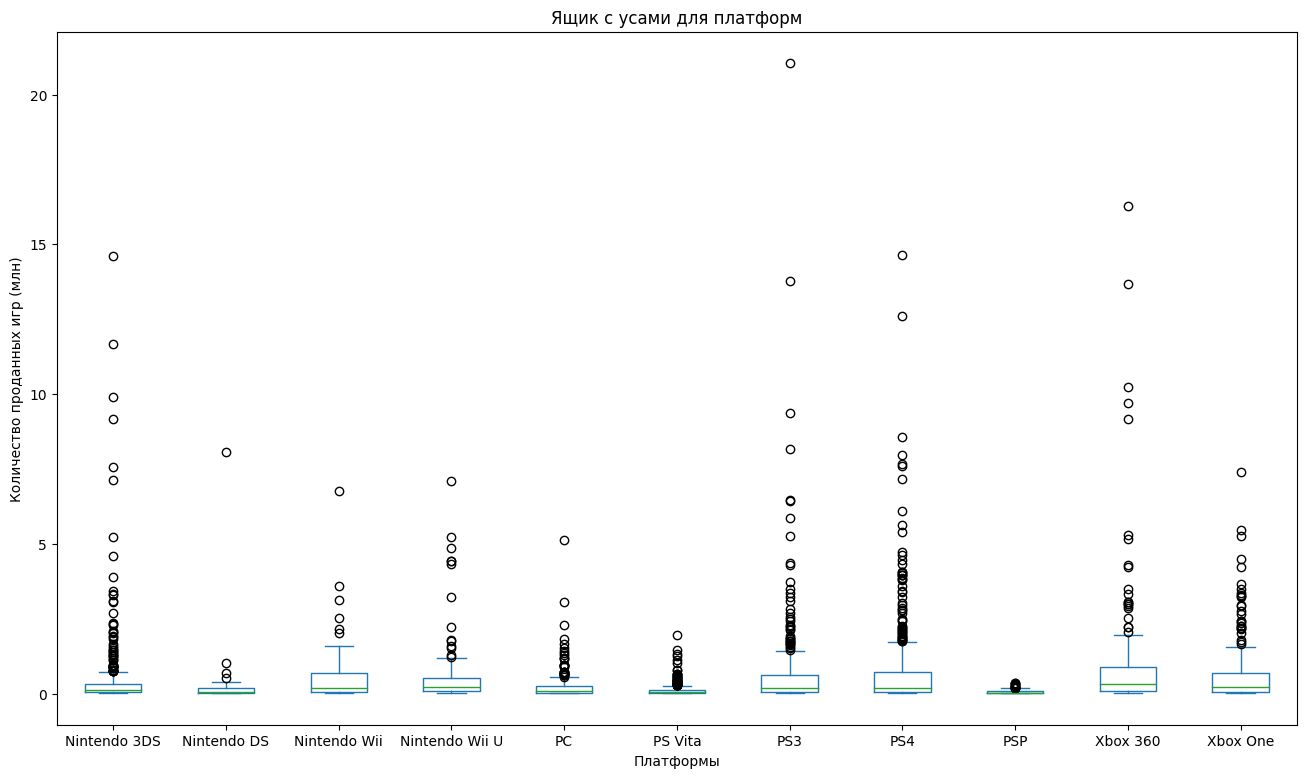

In [42]:
actual_df.pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum').plot(kind='box', figsize=(16, 9));
plt.title('Ящик с усами для платформ');
plt.xlabel('Платформы');
plt.ylabel('Количество проданных игр (млн)');

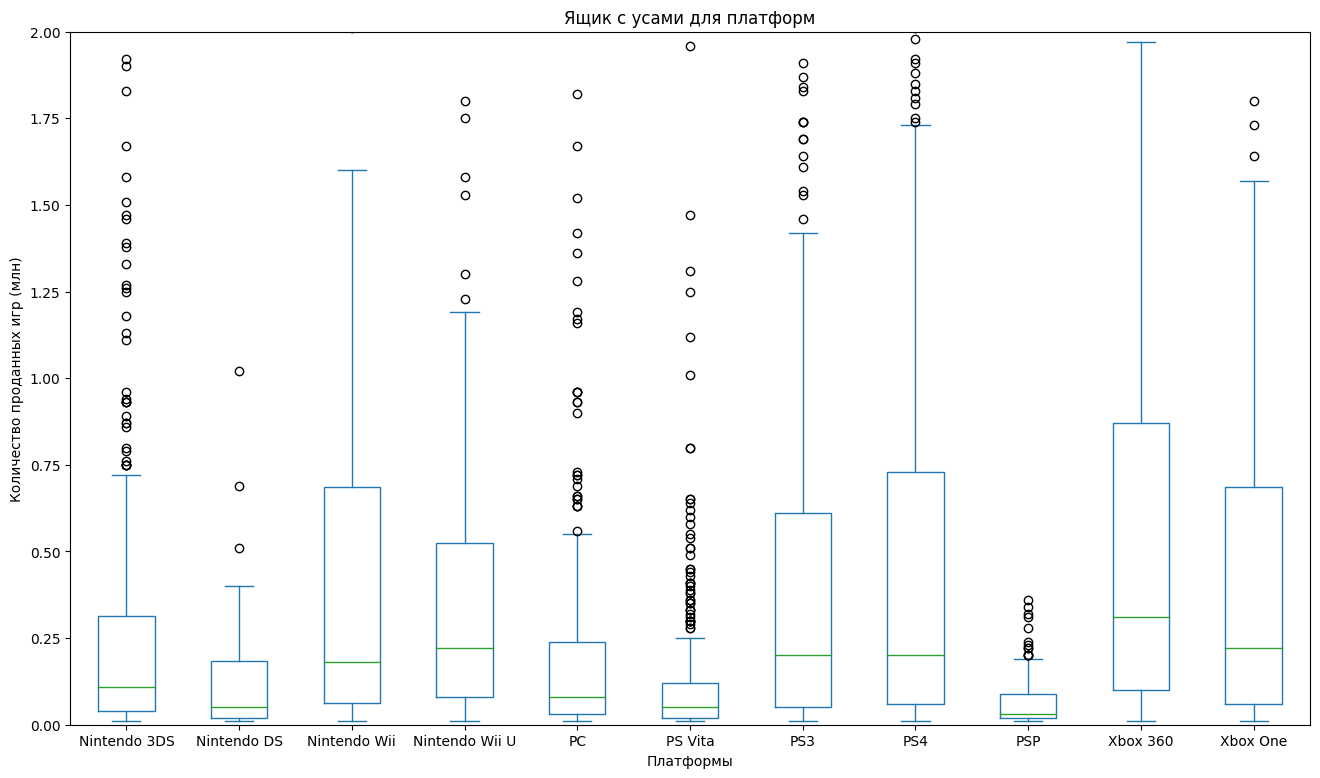

In [43]:
actual_df.pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum').plot(kind='box', figsize=(16, 9), ylim=(0,2));
plt.title('Ящик с усами для платформ');
plt.xlabel('Платформы');
plt.ylabel('Количество проданных игр (млн)');

Медиана в данном примере показывает сколько в среднем продается игр. Типа среднечки, которые пользуются относительной популярностью. Эта метрика показывает сколько платформе приносят любые игры в среднем. А вот выбросы, их количество и их значения продаж говорят о флагманах и продуктах которые двигают платформу. Чем их больше и чем больше их значения, тем лучше. С точки зрения 75 процентиля - ответ дает второй график.  Соотношение между медианой и 75 процентилем во всех платформах примерно совпадает. Это обозначает что различие именно не среднечковых решений уже сильнее начинает проявляться.

In [44]:
actual_df[actual_df['platform'] == 'Nintendo Wii'].groupby('year_of_release')['total_sales'].agg('sum')

year_of_release
2012    21.71
2013     8.59
2014     3.75
2015     1.14
2016     0.18
Name: total_sales, dtype: float64

In [45]:
actual_df[actual_df['platform'] == 'PS3']['year_of_release'].unique()

array([2013, 2012, 2014, 2015, 2016], dtype=int32)

### Посмотрим, как влияют на продажи игр в популярных платформах отзывы пользователей и критиков.

Так как мы заменили пропуски на нули, то не будем их учитывать, а то корреляции не получится

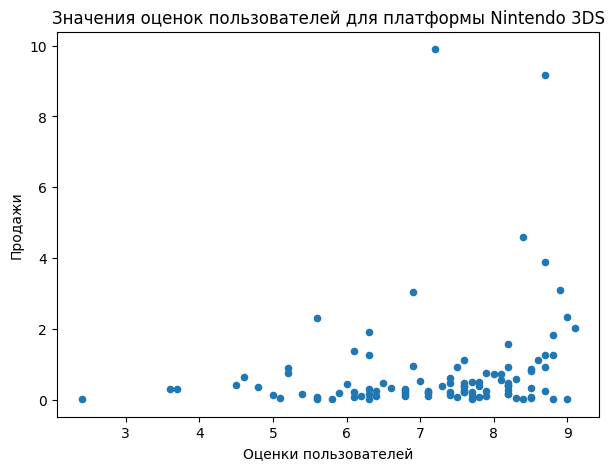

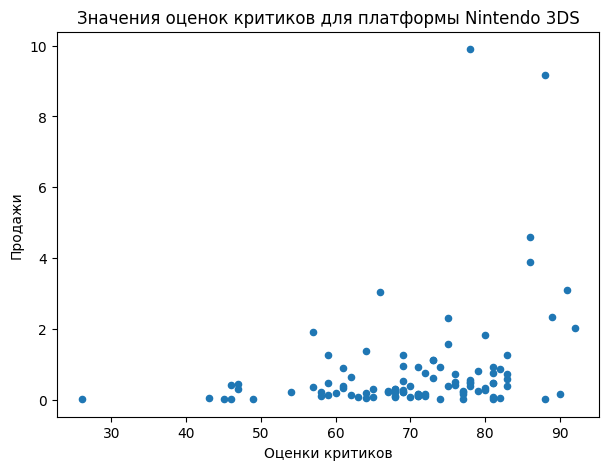

In [46]:
nintendo_3ds = actual_df.query('platform == "Nintendo 3DS" and user_score > 0 and critic_score > 0')
nintendo_3ds.plot(x='user_score', y='total_sales', kind='scatter', figsize=(7, 5));
plt.title('Значения оценок пользователей для платформы Nintendo 3DS');
plt.xlabel('Оценки пользователей');
plt.ylabel('Продажи');
nintendo_3ds.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(7, 5));
plt.title('Значения оценок критиков для платформы Nintendo 3DS');
plt.xlabel('Оценки критиков');
plt.ylabel('Продажи');

In [47]:
nintendo_3ds[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.722762,0.201813
critic_score,0.722762,1.000000,0.310553
total_sales,0.201813,0.310553,1.000000


Как видно из графика и оценки пользователей и критиков, влияние на продажи их оценки оказывают очень слабое

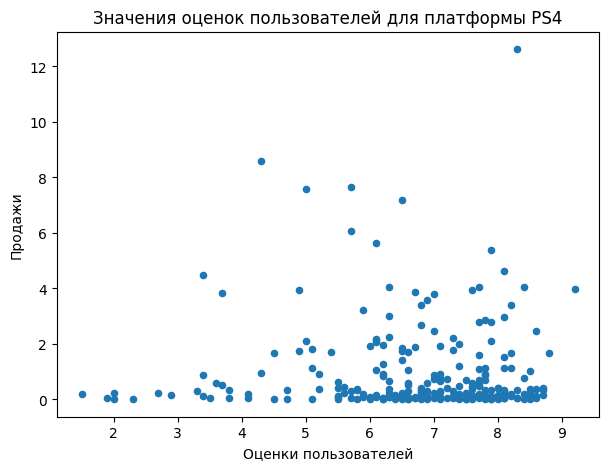

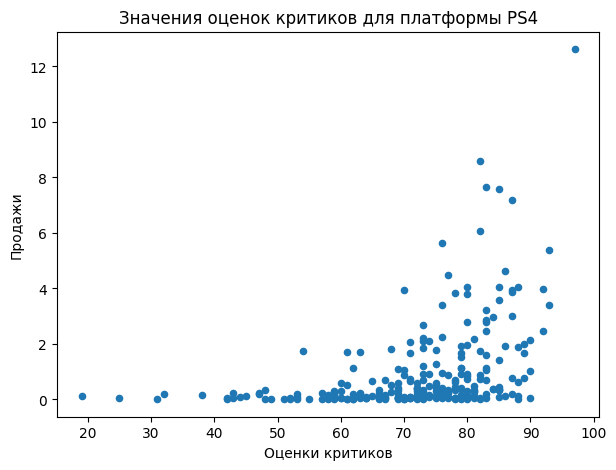

In [48]:
ps4 = actual_df.query('platform == "PS4" and user_score > 0 and critic_score > 0')
ps4.plot(x='user_score', y='total_sales', kind='scatter', figsize=(7, 5));
plt.title('Значения оценок пользователей для платформы PS4');
plt.xlabel('Оценки пользователей');
plt.ylabel('Продажи');
ps4.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(7, 5));
plt.title('Значения оценок критиков для платформы PS4');
plt.xlabel('Оценки критиков');
plt.ylabel('Продажи');

In [49]:
ps4[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.557654,-0.033625
critic_score,0.557654,1.000000,0.405895
total_sales,-0.033625,0.405895,1.000000


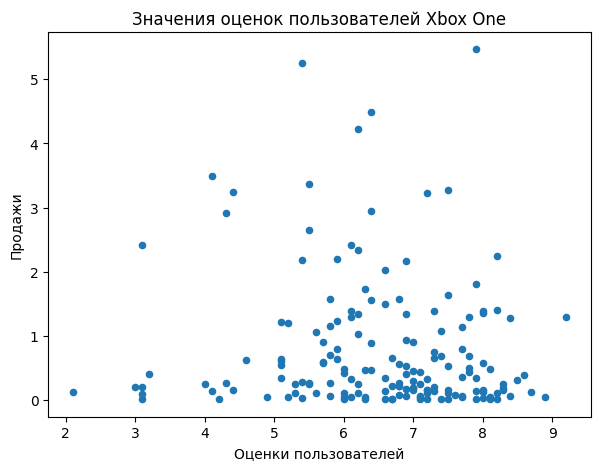

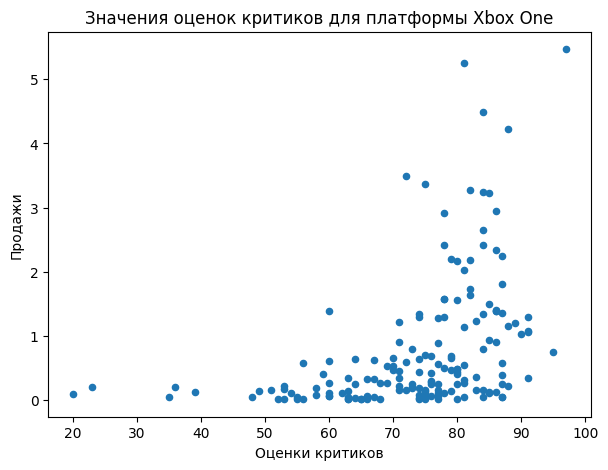

In [50]:
xbox1 = actual_df.query('platform == "Xbox One" and user_score > 0 and critic_score > 0')
xbox1.plot(x='user_score', y='total_sales', kind='scatter', figsize=(7, 5));
plt.title('Значения оценок пользователей Xbox One');
plt.xlabel('Оценки пользователей');
plt.ylabel('Продажи');
xbox1.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(7, 5));
plt.title('Значения оценок критиков для платформы Xbox One');
plt.xlabel('Оценки критиков');
plt.ylabel('Продажи');

In [51]:
xbox1[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.472462,-0.094003
critic_score,0.472462,1.000000,0.410422
total_sales,-0.094003,0.410422,1.000000


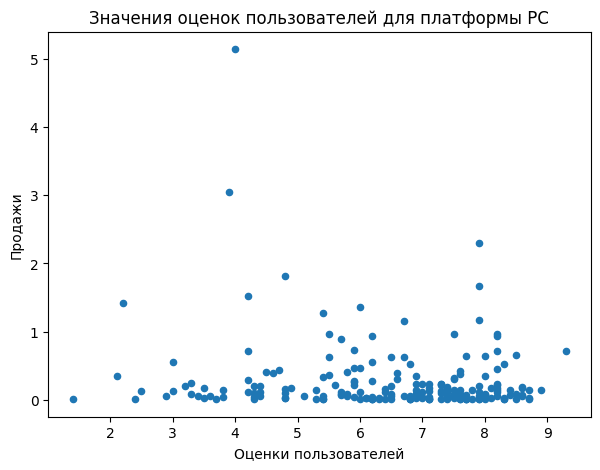

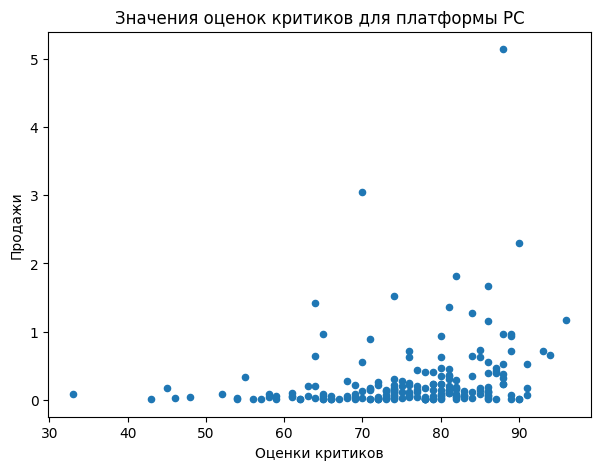

In [52]:
pc = actual_df.query('platform == "PC" and user_score > 0 and critic_score > 0')
pc.plot(x='user_score', y='total_sales', kind='scatter', figsize=(7, 5));
plt.title('Значения оценок пользователей для платформы PC');
plt.xlabel('Оценки пользователей');
plt.ylabel('Продажи');
pc.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(7, 5));
plt.title('Значения оценок критиков для платформы PC');
plt.xlabel('Оценки критиков');
plt.ylabel('Продажи');

In [53]:
pc[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.432587,-0.136934
critic_score,0.432587,1.000000,0.236008
total_sales,-0.136934,0.236008,1.000000


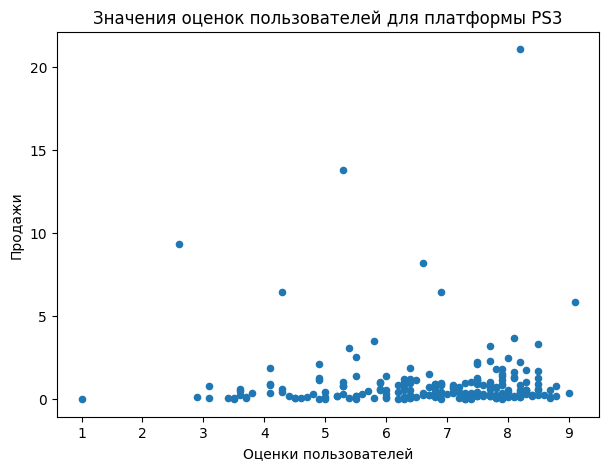

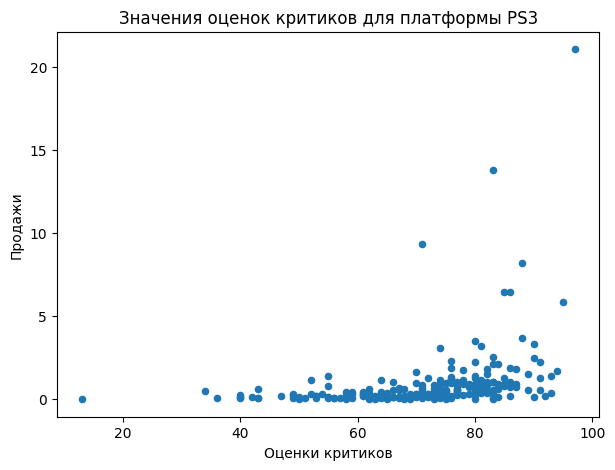

In [54]:
ps3 = actual_df.query('platform == "PS3" and user_score > 0 and critic_score > 0')
ps3.plot(x='user_score', y='total_sales', kind='scatter', figsize=(7, 5));
plt.title('Значения оценок пользователей для платформы PS3');
plt.xlabel('Оценки пользователей');
plt.ylabel('Продажи');
ps3.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(7, 5));
plt.title('Значения оценок критиков для платформы PS3');
plt.xlabel('Оценки критиков');
plt.ylabel('Продажи');

In [55]:
ps3[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.539456,0.003227
critic_score,0.539456,1.000000,0.331057
total_sales,0.003227,0.331057,1.000000


Как видно из графиков и матриц, продажи игр на популярных плаформах слабо или очень слабо зависят от оценок пользователей и критиков. Можно сделать вывод, что и для остальных платформ будет также

### Посмотрим распределение жанров

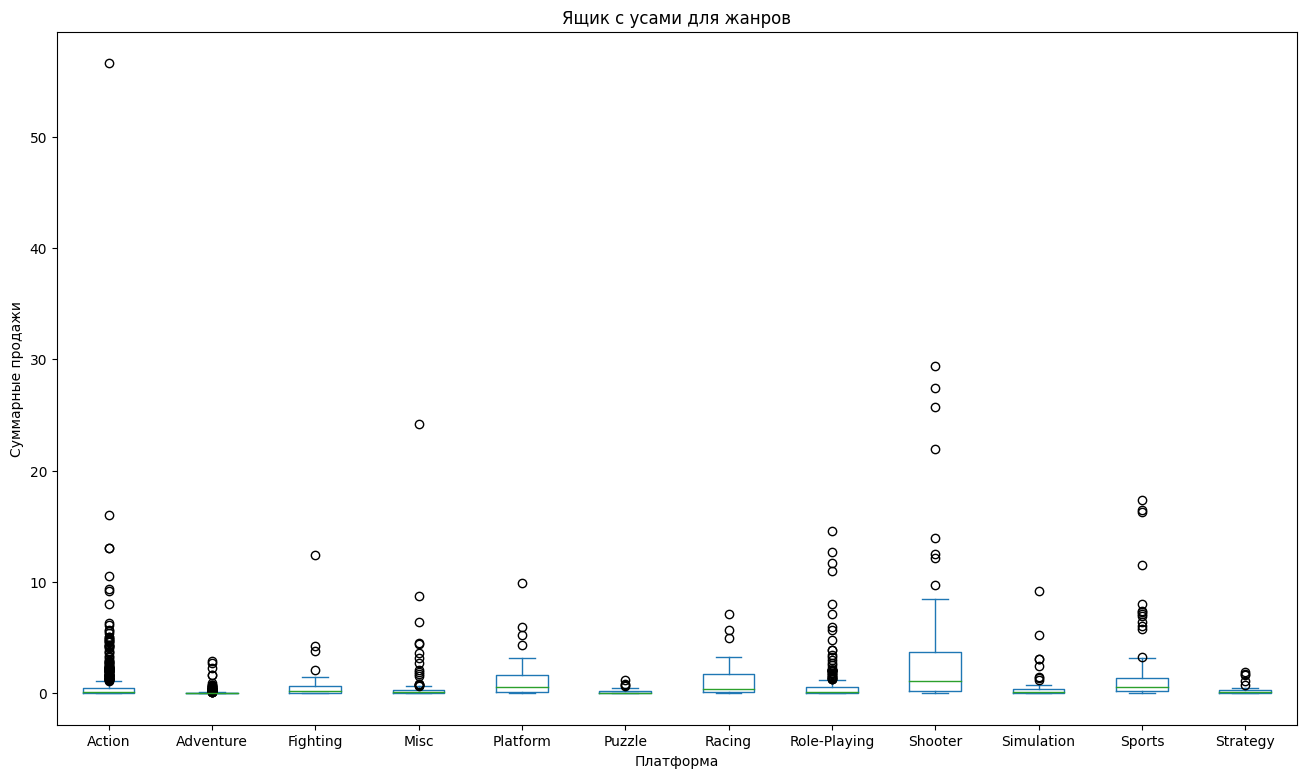

In [56]:
actual_df.pivot_table(index='name', columns='genre', values='total_sales', aggfunc='sum').reset_index().\
                      plot(kind='box', figsize=(16, 9));
plt.title('Ящик с усами для жанров');
plt.xlabel('Платформа');
plt.ylabel('Суммарные продажи');

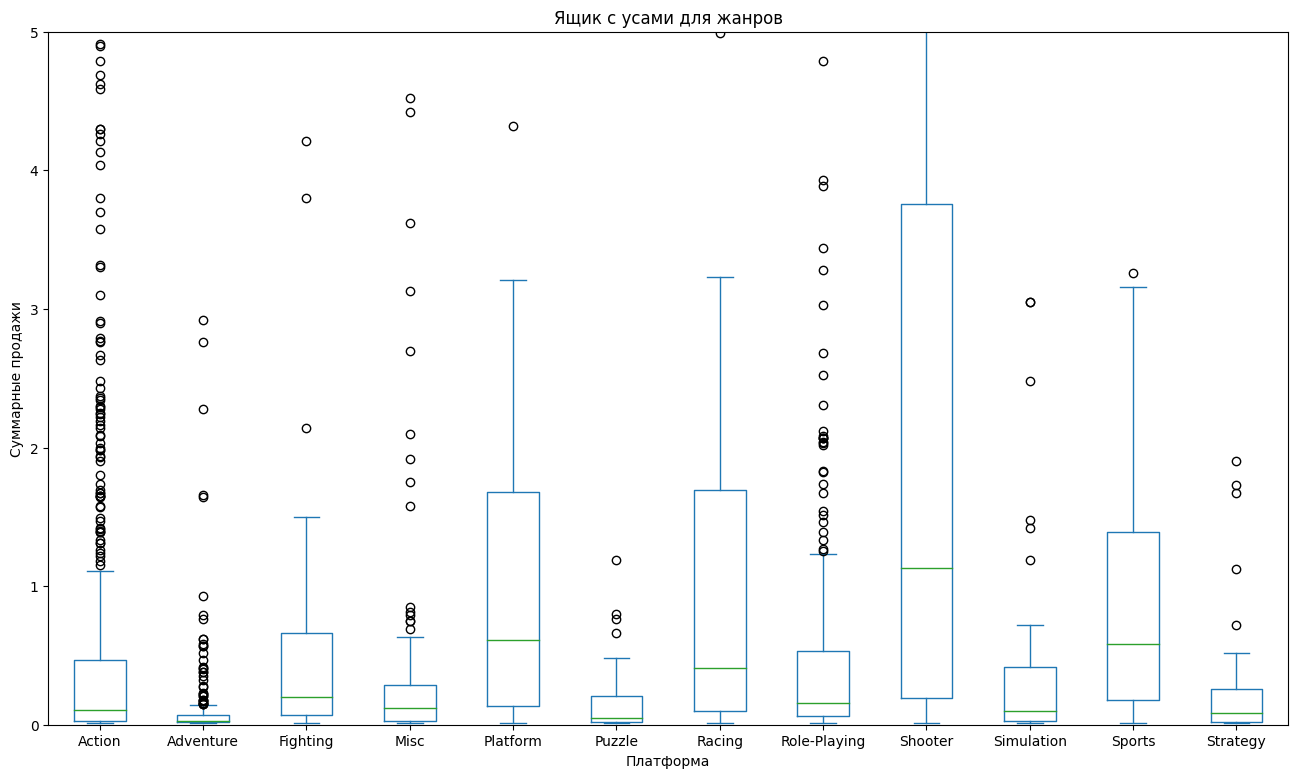

In [57]:
actual_df.pivot_table(index='name', columns='genre', values='total_sales', aggfunc='sum').reset_index().\
                      plot(kind='box', figsize=(16, 9), ylim=(0, 5));
plt.title('Ящик с усами для жанров');
plt.xlabel('Платформа');
plt.ylabel('Суммарные продажи');

Вывод: самыми прибыльными жанрами являются:
- Шутеры
- Гонки
- Платформеры
- Спорт


## 3. Портрет пользователя каждого региона

In [58]:
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
name = ['Северная Америка', 'Западная Европа', 'Япония', 'Другие']

### Посмотрим на доли продаж игр на самых популярных платформах в каждом регионе

In [59]:
def ratio(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.2f} ({:d})".format(pct/100., absolute)

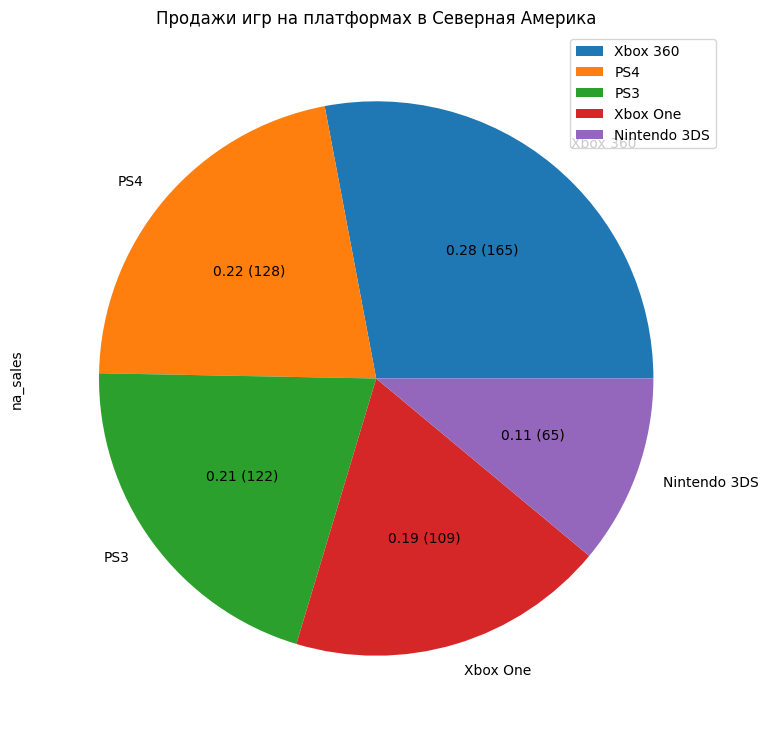

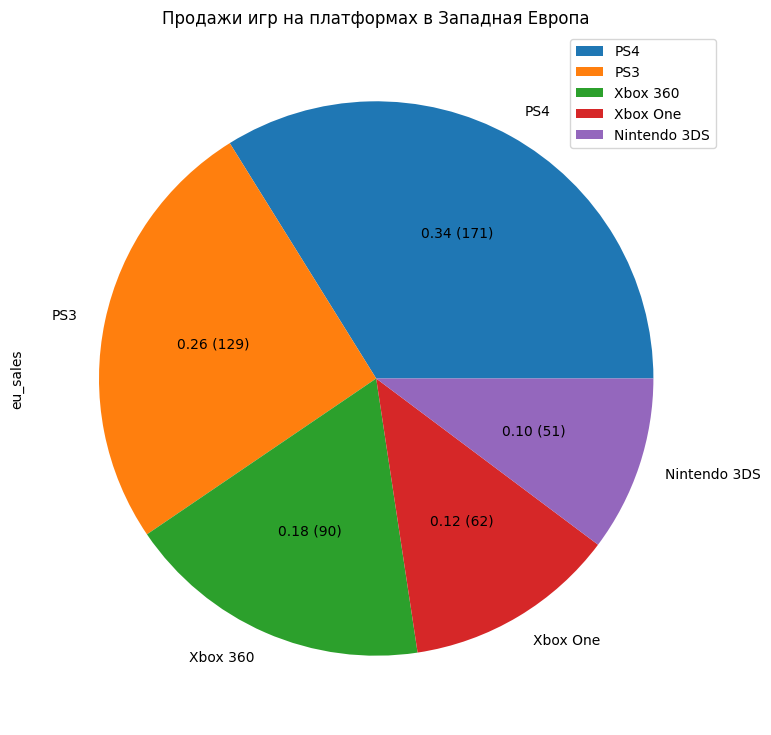

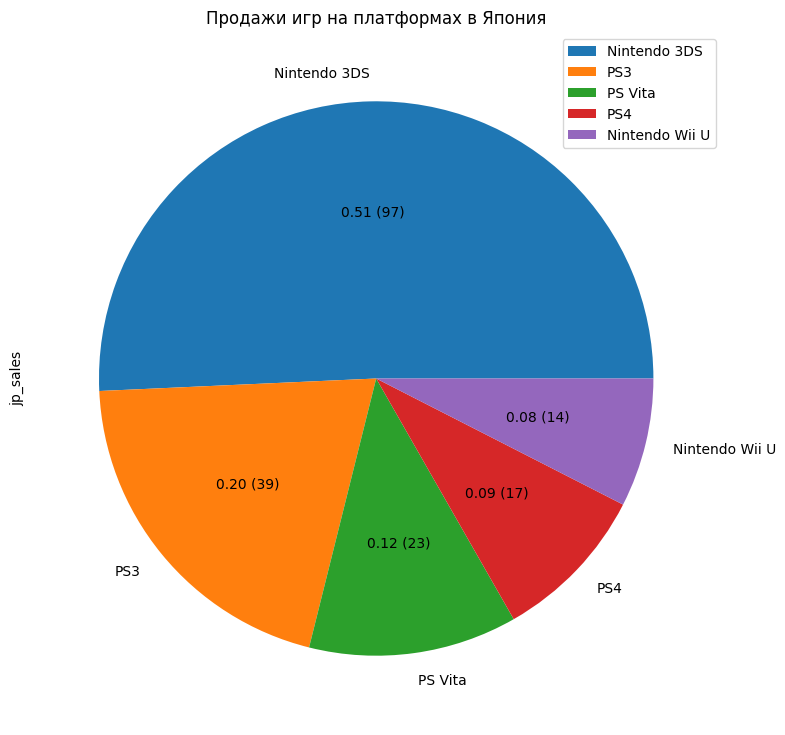

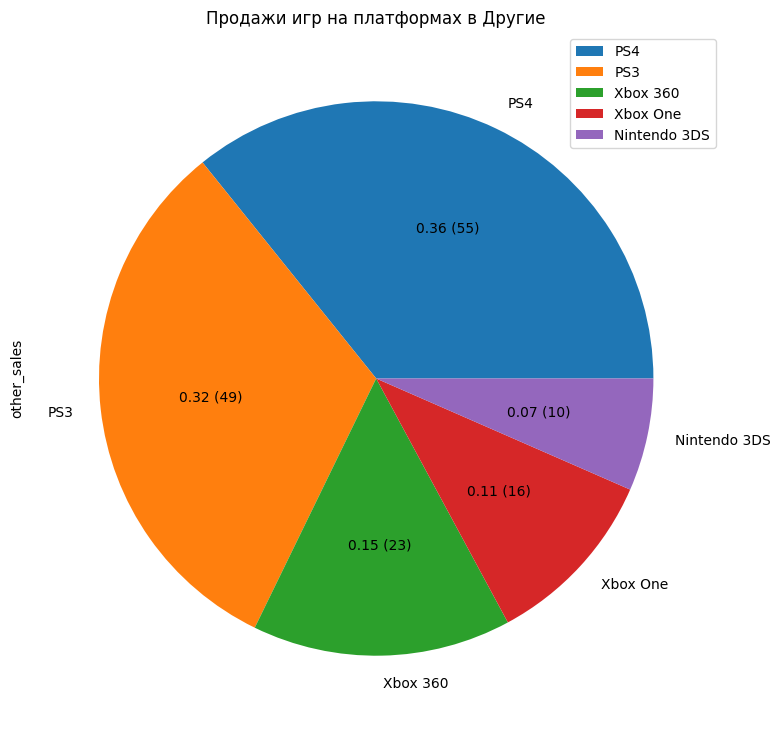

In [60]:
for index, region in enumerate(regions):
  actual_df.pivot_table(index='platform', values=region, aggfunc='sum').\
                      sort_values(by=region, ascending=False).\
                      head().\
                      plot(y=region,
                           kind='pie',
                           figsize=(16, 9),
                           title=f'Продажи игр на платформах в {name[index]}',
                           autopct=lambda pct: ratio(pct, actual_df[region]));

Различия долей продаж игр на разных платформах в каждом регионе <0.1. Также можно с уверенностью сказать, что пользователи регионов, в большинстве, предпочитают играть на платформах, выпущенных в их регионе.

В остальных регионах самой популярной платформой является PS3, но сказать что-то еще сложно.

### Теперь взглянем на популярные жанры

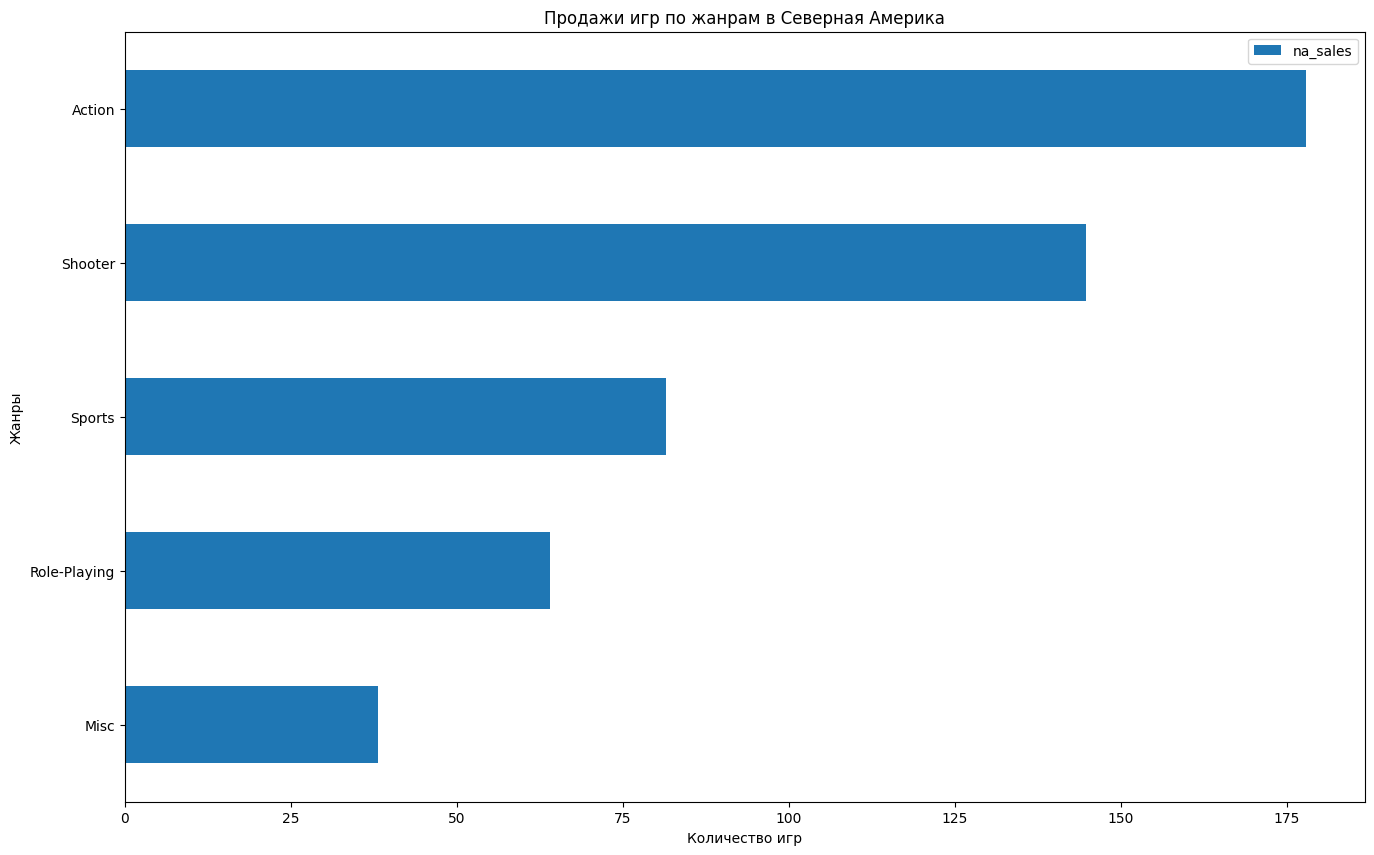

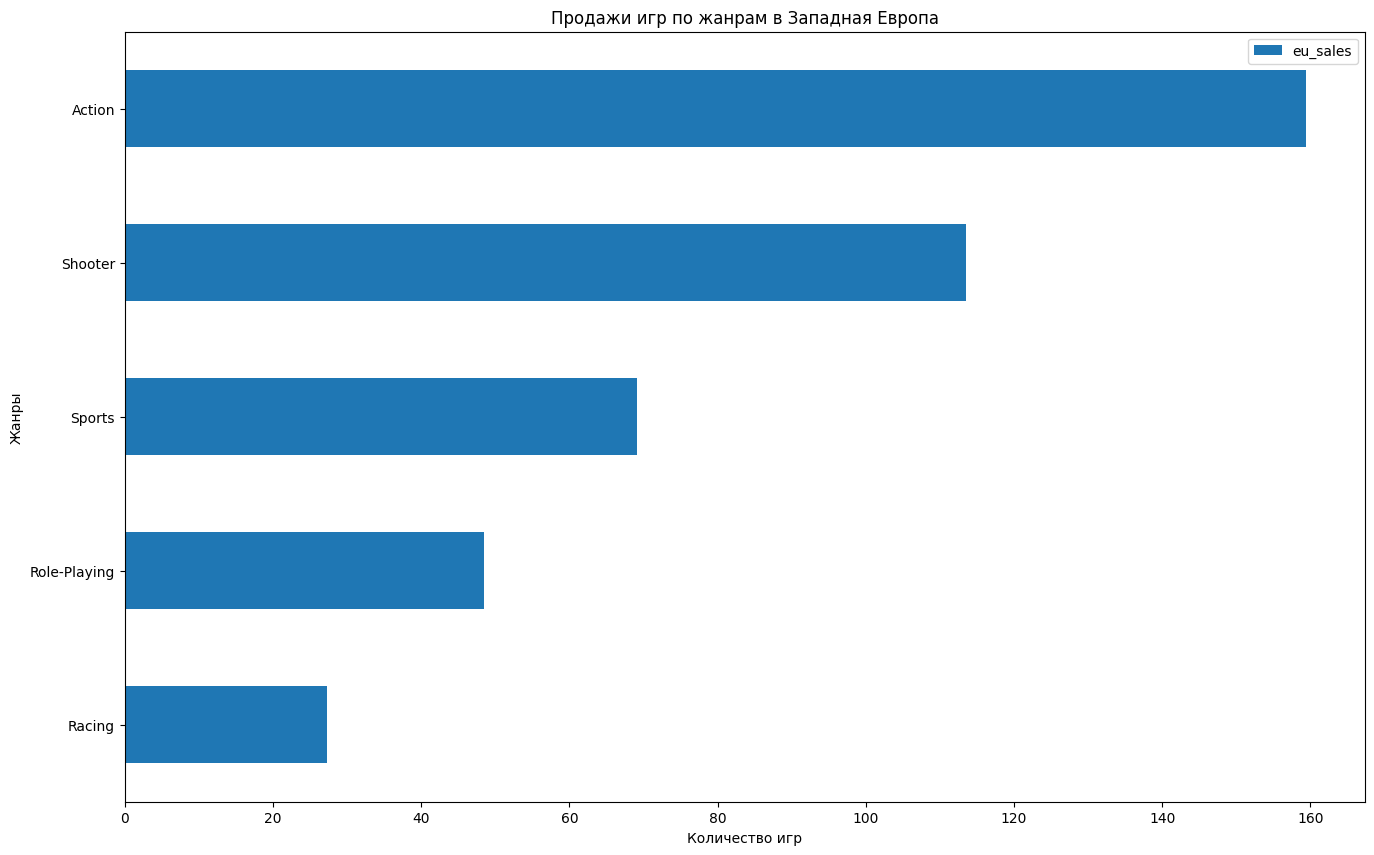

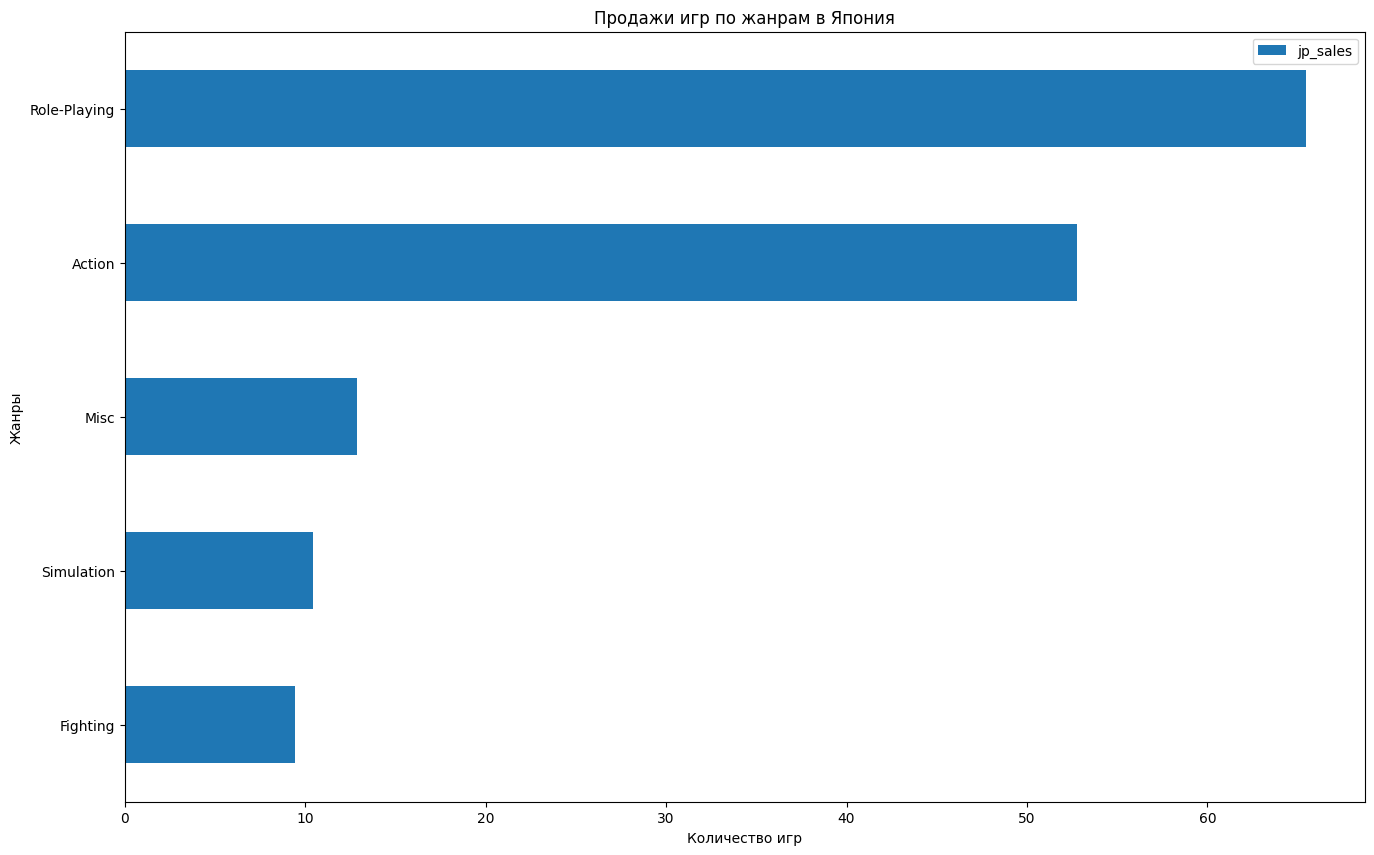

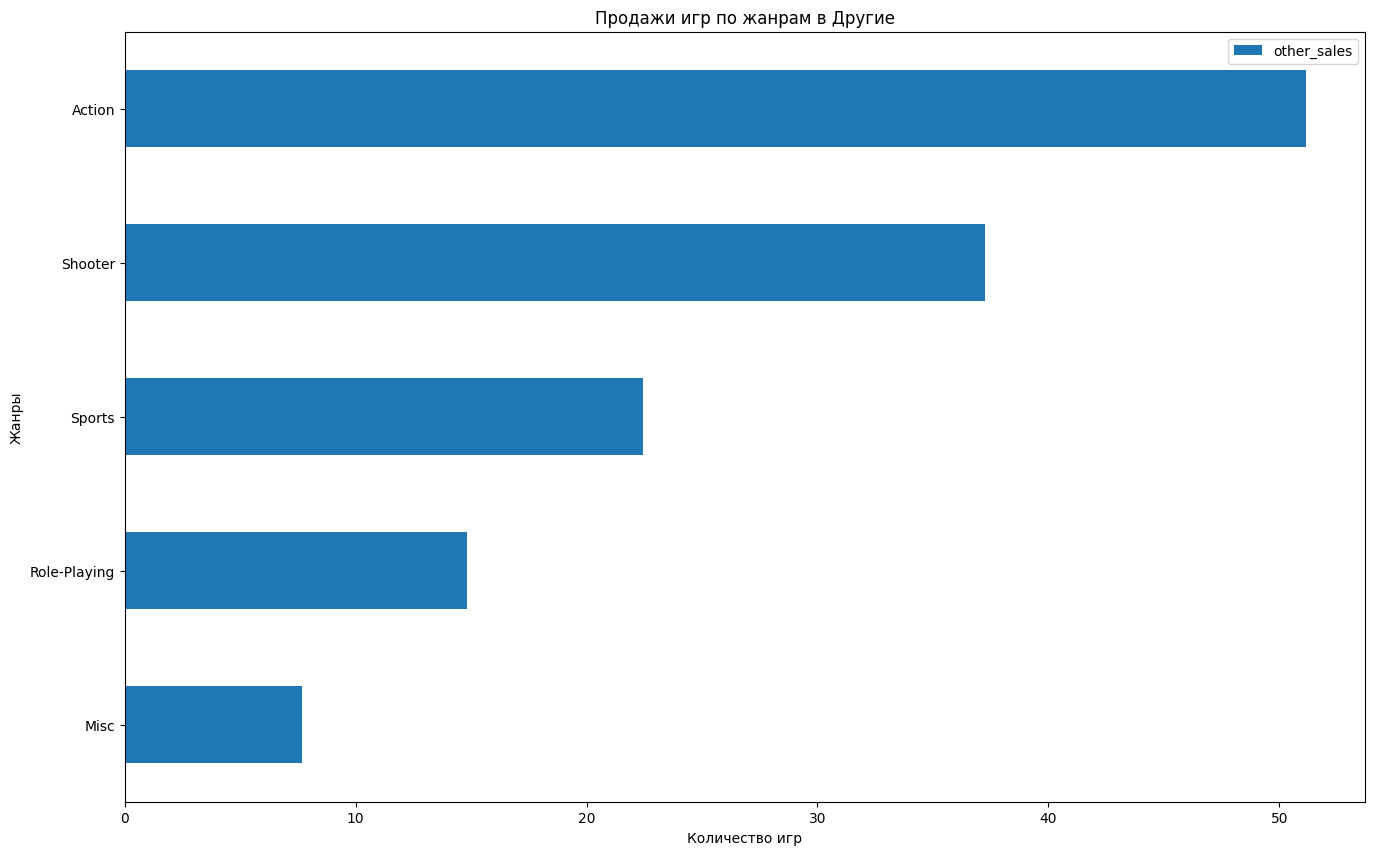

In [61]:
for index, region in enumerate(regions):
  actual_df.pivot_table(index='genre', values=region, aggfunc='sum').\
            sort_values(by=region, ascending=True).\
            tail().\
            plot(kind='barh',
                 figsize=(16,10),
                 title=f'Продажи игр по жанрам в {name[index]}')
  plt.xlabel('Количество игр');
  plt.ylabel('Жанры');

Различия между Северной Америкой и Западной Европой минимальны, на последнем месте у Америки - ролевые игры, а у Европы - гонки, остальное совпадает (Экшн, спорт и шутеры). У Японии же на первом месте идут ролевые игры, как раз этим она и знаменита, тем более в ролевые игры удобно играть на портативных консолях, которые преобладают в Японии. В Европе и Америке играют дома, потому что плотность населения не такая большая и площадь жилых помещений больше, потребности в портативных консолях - нет.

### Проверим, вияет ли рейтинг ESRB на продажи в каждом регионе

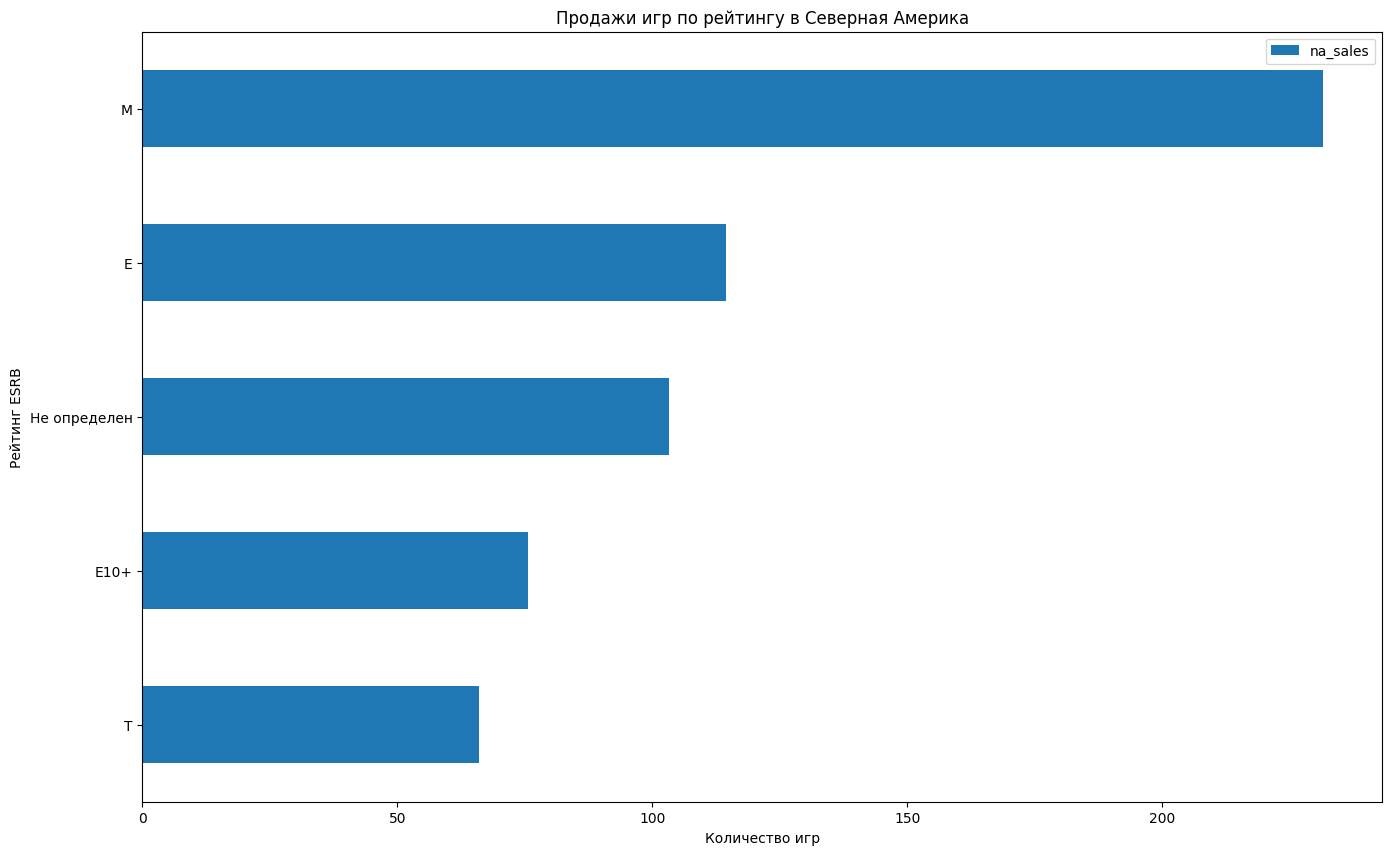

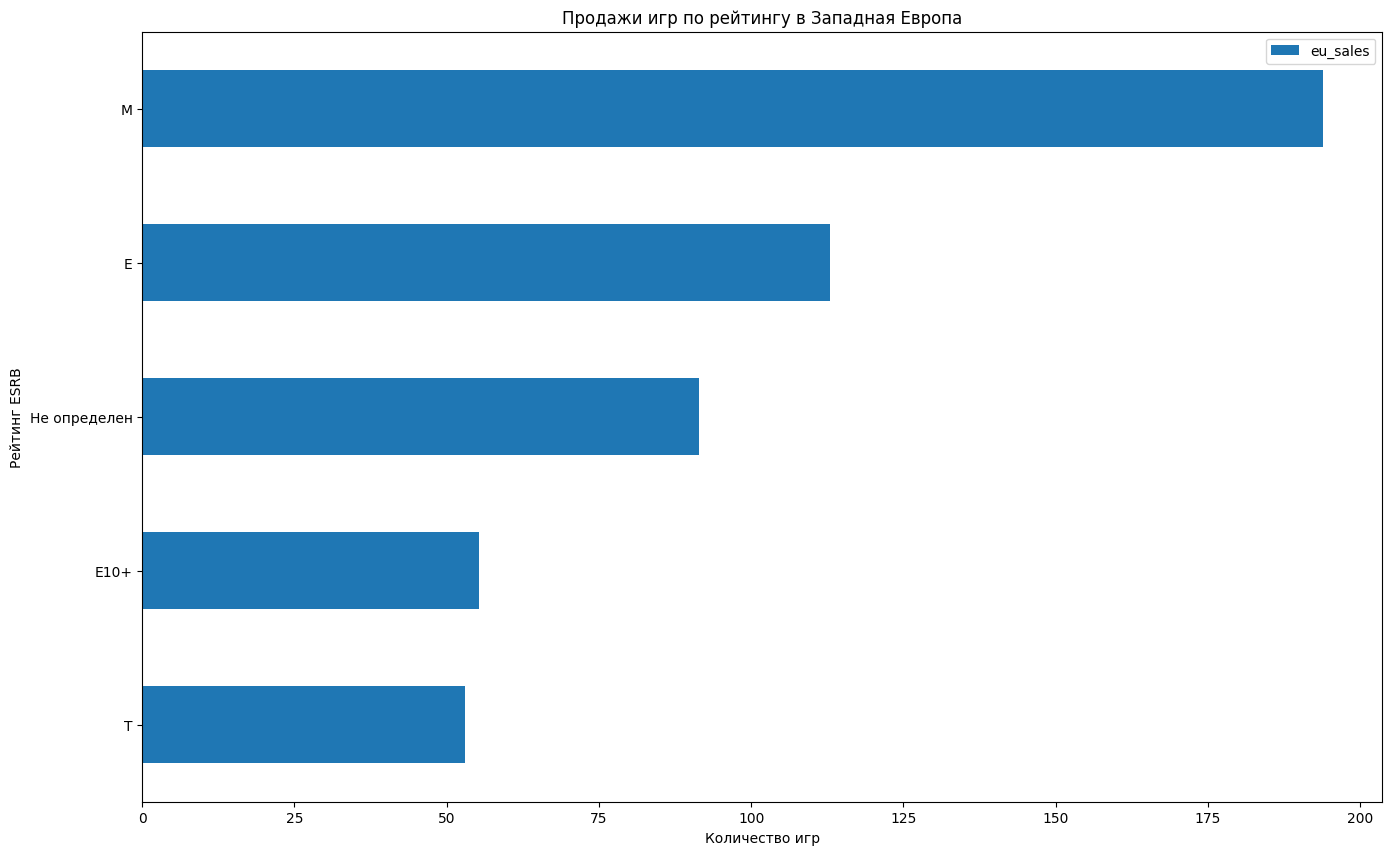

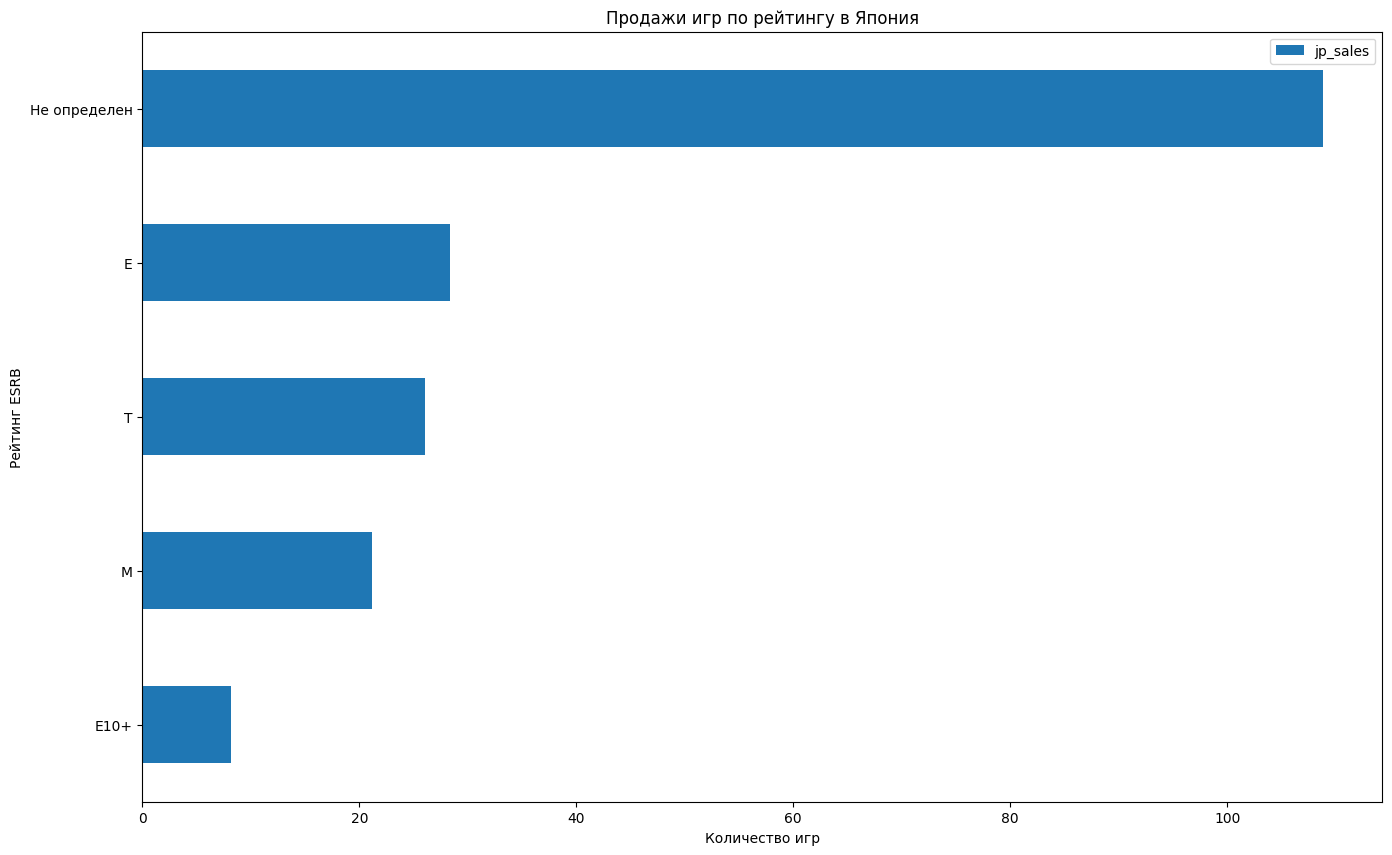

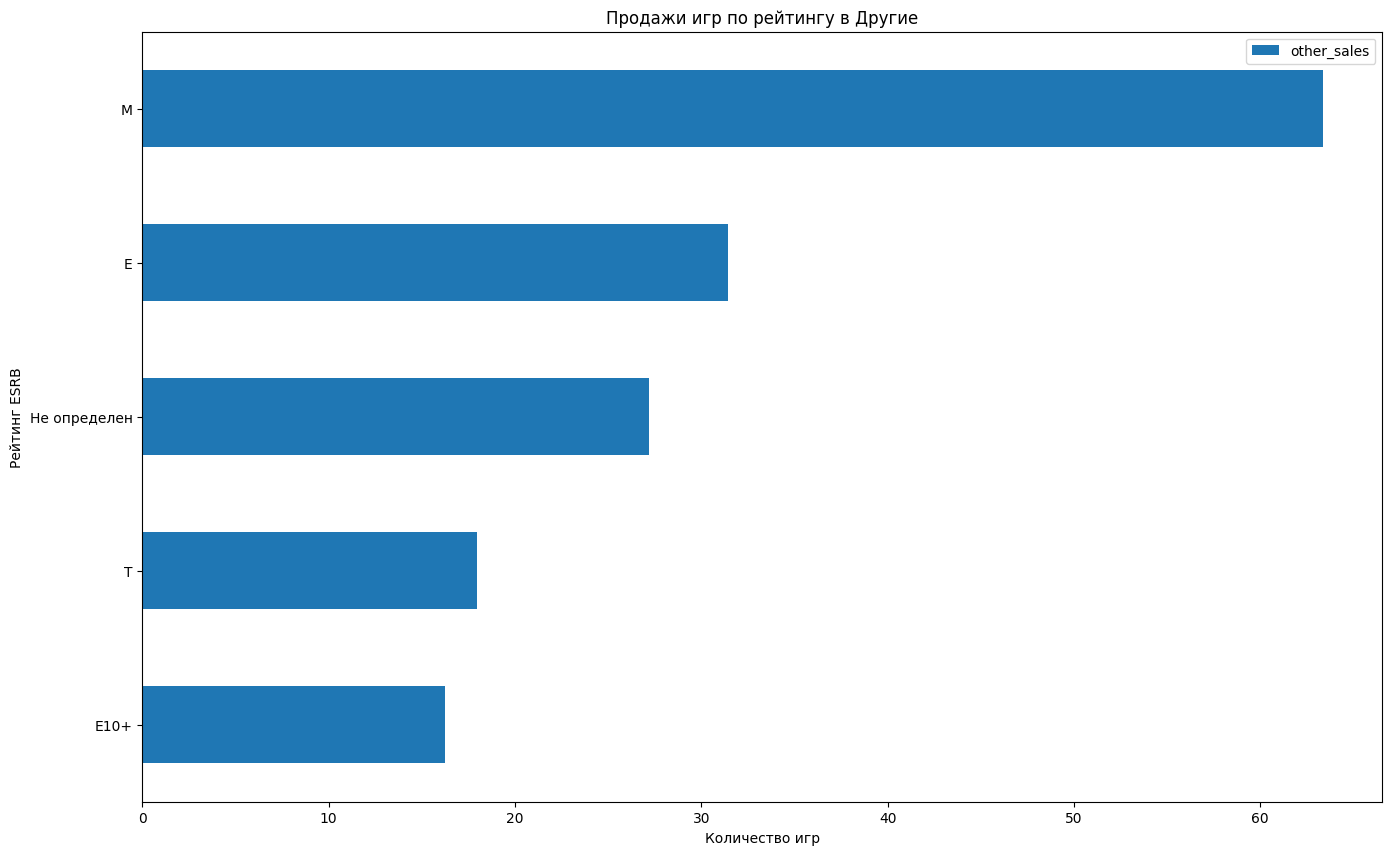

In [62]:
for index, region in enumerate(regions):
  actual_df.pivot_table(index='rating', values=region, aggfunc='sum').\
  sort_values(by=region, ascending=True).\
  plot(kind='barh',
       figsize=(16,10),
      title=f'Продажи игр по рейтингу в {name[index]}')
  plt.xlabel('Количество игр');
  plt.ylabel('Рейтинг ESRB');

Так как в Америке и Европе игры связаны с комфортом (достаточно большая площадь для спортивных игр, платформы в основном не портативные), то можно рпедположить, что играют на платформах всей семьей, либо чередуясь, и данные графики это подтверждают. Самый популярный рейтинг в обоих странах - E (для всех), в Японии же этот рейтинг стоит на втором месте, сразу после рейтинга "Не определен", вероятно много игр, выпущенных региональным издателем в альфа- или бета-тест. Далее идет рейтинг 17+, для достаточно взрослых людей, которые живут без детей, подростки, которые занимают третье место, так как на данный момент, являются одной из наиболее популярной возрастной категории потребителей данного сегмент продаж, и только потом дети старше 10.

## 4. Проверка гипотез

### Проверка первой гипотезы

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [63]:
# Сформируем выборку пользовательских рейтингов платформ Xbox One и PC
rating_xbox1 = actual_df.query('platform == "Xbox One" and user_score > 0')['user_score']
rating_pc = actual_df.query('platform == "PC" and user_score > 0')['user_score']
print(f'Средний пользоваельский рейтинг Xbox One: {rating_xbox1.mean()}')
print(f'Средний пользоваельский рейтинг PC: {rating_xbox1.mean()}')

Средний пользоваельский рейтинг Xbox One: 6.521428108215332
Средний пользоваельский рейтинг PC: 6.521428108215332


In [64]:
# Проверим нулевую гипотезу
alpha = 0.05
results = st.ttest_ind(rating_xbox1, rating_pc, equal_var=False)

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489560463017016
Не получилось отвергнуть нулевую гипотезу


Первая гипотеза не подтвердилась, средние пользовательские рейтинги PC и Xbox One разные

### Проверка второй гипотезы

H0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые

H1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [65]:
# Сформируем выборку пользовательских рейтингов в жанрах Action и Sports
rating_action = actual_df.query('genre == "Action" and user_score > 0')['user_score']
rating_sport = actual_df.query('genre == "Sports" and user_score > 0')['user_score']
print(f'Средний пользоваельский рейтинг жанра Action: {rating_action.mean()}')
print(f'Средний пользоваельский рейтинг жанра Sports: {rating_sport.mean()}')

Средний пользоваельский рейтинг жанра Action: 6.825047969818115
Средний пользоваельский рейтинг жанра Sports: 5.455896854400635


In [66]:
# Проверим нулевую гипотезу
alpha = 0.05

results = st.ttest_ind(rating_action, rating_sport, equal_var=False)

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.242899260229549e-20
Отвергаем нулевую гипотезу


Делаем вывод о том, что нулевая гипотеза не подтвердилась, следовательно средние пользовательские рейтинги и жанров Action и Sports разные

Нулевая гипотеза это всегда гипотеза об отсутствии какого-либо эффекта.

Так как выборки состоят из количества элементов больше 30, то среднее выборок распределено нормально и критерий Стьюдента подходит для этого случая.

Есть специальный метод в библиотеке scipy.stats для проверки гипотезы о равенстве средних двух генеральных совокупностей - ttest_ind.



## 5. Общий вывод

В ходе работы над данны проектом мы выявили критерии, определяющие успешность игры:

В разных регионах популярные платформы, жанры и рейтинг ESRB отличаются, также на продажи влияет оценка критиков.

В северной Америке лучше всего будут продаваться:
- ESRB: M, E, E10+
- Жанры: Action, Shooter, Sports, Role-Playing, Misc
- Платформы: Xbox360, PS4, PS3,Xbox One, Nintendo 3DS

В Западной Европе лучше всего будут продаваться:
- ESRB: M, E, E10+
- Жанры: Action, Shooter, Sports, Role-Playing, Racing
- Платформы: PS4, PS3, Xbox 360, Xbox One, Nintendo 3DS

В Японии лучше всего будут продаваться:
- ESRB: E, T, M
- Жанры: Role-Playing, Action, Misc, Simulator, Fighting
- Платформы: Nintendo 3DS, PS3, PS Vita, PS4, Nintendo Wii U

(Расположение ESRB, жанров и платформ от более популярных, к менее популярным)